# **WAAFLE data analysis**

### Libraries and functions

In [1]:
#Install necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.stats as stats
import scikit_posthocs as sp
import seaborn as sns
import statannot
from adjustText import adjust_text
import statsmodels.api as sm
from statsmodels.formula.api import glm
import requests

In [2]:
def plot_single_box_swarm(df,x,y, title, color, ylabel):
    """Plot a single box plot with swarm plot for the specified column in the DataFrame"""
    
    # Set the figure size
    plt.figure(figsize=(10, 8))

    # Create the box plot with swarm plot
    sns.boxplot(x=df[y],y=df[x], width=0.4, color=color, showfliers=False)  # Adjust box width and color
    sns.swarmplot(x=df[y],y=df[x], color='k', size=3, alpha=0.6)  # Add swarm plot with custom size and color
    
    # Calculate and annotate median
    median = df[x].median()
    
    #define the number of digits after comman in medians
    max_value = df[x].max()
    if max_value > 100:
        median_formatted = f'{median:.0f}'
    elif max_value > 1:
        median_formatted = f'{median:.2f}'
    else:
        median_formatted = f'{median:.1e}'
    
    
    plt.text(-0.2, median, median_formatted, color='black', ha='center', va='center', 
             fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Set titles and labels
    plt.title(title, fontsize=16)
    plt.xlabel('Data', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    plt.title(title)
    plt.xlabel('Data')
    plt.ylabel(ylabel)

    plt.yticks(fontsize=12)
    plt.xticks([])  # Remove x-ticks as there's only one category

    # Add gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Show the plot
    plt.show()

In [3]:
def plot_single_histogram(df, column, title, color, xlabel, ylabel):
    """Plot a single histogram for the specified column in the DataFrame. """
    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Create the histogram with KDE
    sns.histplot(df[column], bins=100, kde=True, color=color)

    # Set titles and labels
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Customize ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.show()


In [4]:
def plot_box_swarm_and_histogram(df, column, title_box, title_hist, color_box, color_hist, 
                                 ylabel_box, xlabel_hist, ylabel_hist):
    """Plot a box plot with swarm plot and a histogram side by side for the specified column in the DataFrame"""
    
    # Create a figure with two subplots: one for the box plot + swarm plot, one for the histogram
    fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(18, 8))

    # Plot the box plot with swarm plot on the first subplot
    sns.boxplot(data=df[column], width=0.4, color=color_box, ax=ax_box, showfliers=False)
    sns.swarmplot(data=df[column], color='k', size=3, alpha=0.6, ax=ax_box)
    
    # Calculate and annotate median on the box plot
    median = df[column].median()
    max_value = df[column].max()
    if max_value > 100:
        median_formatted = f'{median:.0f}'
    elif max_value > 1:
        median_formatted = f'{median:.3f}'
    else:
        median_formatted = f'{median:.1e}'
    
    ax_box.text(-0.2, median, median_formatted, color='black', ha='center', va='center', 
                fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    ax_box.set_title(title_box, fontsize=16)
    ax_box.set_xlabel('Data', fontsize=14)
    ax_box.set_ylabel(ylabel_box, fontsize=14)
    ax_box.yaxis.set_tick_params(labelsize=12)
    ax_box.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax_box.set_xticks([])  # Remove x-ticks as there's only one category
    
    # Plot the histogram on the second subplot
    sns.histplot(df[column], bins=50, kde=True, color=color_hist, ax=ax_hist)
    
    ax_hist.set_title(title_hist, fontsize=16)
    ax_hist.set_xlabel(xlabel_hist, fontsize=14)
    ax_hist.set_ylabel(ylabel_hist, fontsize=14)
    ax_hist.xaxis.set_tick_params(labelsize=12)
    ax_hist.yaxis.set_tick_params(labelsize=12)
    ax_hist.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

In [5]:
def spearman_correlation_scatter(df, data1:str, data2:str, size:str="medium", title:str="", xlab:str="", ylab:str=""):
    '''This function calulcates the spearman correlation coefficient between two series of data and creates a scatter plot. It needs as input a dataframe,
    the name of the two columns and the desired size of the plot in the form of a string "big"/"medium"/"small". Addittionally, specify plot title and label'''
    
    # Extract the data to check for significance
    series1 = pd.Series(df[data1].tolist())
    series2 = pd.Series(df[data2].tolist())
    
    # Calculate Spearman correlation
    spearman_corr, p_value = stats.spearmanr(series1, series2)
    
    # Check if p-values is significant
    if p_value >= 0.05:
        print(f"The p-value is not significant (p = {p_value:.2f}), so the plot will not be created.")
        return
    else:
        # Choose dimensions
        size_dict = {"big": (16, 14, 12, 10, 8), "medium": (14, 12, 10, 8, 6), "small": (12, 10, 8, 6, 4)}
        dimensions = size_dict.get(size, size_dict["medium"]) 
        
        # Set size
        plt.figure(figsize=(dimensions[2], dimensions[4]))
        
        # Plot scatter plot
        scatter = plt.scatter(series2, series1, c=series1, cmap="viridis", alpha=0.9, zorder=2)
        
        # Title and labels
        plt.title(title if title else f"Scatter plot of correlation between {data1} and {data2}", fontsize=dimensions[0])
        plt.xlabel(xlab if xlab else f"{data2}", fontsize=dimensions[1])
        plt.ylabel(ylab if ylab else f"{data1}", fontsize=dimensions[1])
        
        # Add a regression line
        slope, intercept, r_value, p_value_linreg, std_err = stats.linregress(series2, series1)
        line = slope * np.array(series2) + intercept
        plt.plot(series2, line, color='red', label='Regression Line', alpha=0.6)
        
        # Add correlation text
        plt.text(0.95, 0.05, f'Spearman coeff. : {spearman_corr:.3f}\np-value: {p_value:.2e}', 
                 ha='right', va='bottom', transform=plt.gca().transAxes, color="red", fontsize=dimensions[2],
                 bbox=dict(facecolor='white', alpha=1))
        
        # Set gridlines to horizontal only
        plt.grid(True, axis='both', linestyle='--', linewidth=0.5, zorder=1)
        # Show plot
        plt.show()


In [6]:
def multiple_spearman_correlation_scatter(df1, data1:str, data2:str, df2, data3:str, data4:str, size:str="medium", title1:str="", xlab1:str="", ylab1:str="", title2:str="", xlab2:str="", ylab2:str=""):
    '''This function calulcates the spearman correlation coefficient between four series of data and creates 2 scatter plots. It needs as input 2 dataframes,
    the name of the four columns and the desired size of the plot in the form of a string "big"/"medium"/"small". Addittionally, specify plots titles and labels'''
    
    # Extract the data to check for signifcance
    series1=pd.Series(df1[data1].tolist())
    series2=pd.Series(df1[data2].tolist())
    series3=pd.Series(df2[data3].tolist())
    series4=pd.Series(df2[data4].tolist())
        
    # Calculate Spearman correlation
    spearman_corr_1_2, p_value_1_2 =stats.spearmanr(series1, series2)
    spearman_corr_3_4, p_value_3_4 =stats.spearmanr(series3, series4)

        # Check if p-values are significant
    if p_value_1_2 >= 0.05 and p_value_3_4 >= 0.05:
        print(f"The p-values are not significant (p1 = {p_value_1_2:.3f}, p2 = {p_value_3_4:.3f}), so the plot will not be created.")
        return
    
    if p_value_1_2 >= 0.05:
        print(f"Spearman correlation is not significant between {data1} and {data2} (p = {p_value_1_2:.3f}), so only the second plot will be created.")
        spearman_correlation_scatter(df2, data3, data4, size, title2)
        return
    
    if p_value_3_4 >= 0.05:
        print(f"Spearman correlation is not significant between {data3} and {data4} (p = {p_value_3_4:.3f}), so only the first plot will be created.")
        spearman_correlation_scatter(df1, data1, data2, size, title1)
        return

    # Choose dimensions
    size_dict = {"big": (16, 14, 12, 10, 8), "medium": (14, 12, 10, 8, 6), "small": (12, 10, 8, 6, 4)}
    dimensions = size_dict.get(size, size_dict["medium"])
            
    # Set up the figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(dimensions[0], dimensions[4]))  # 1 row, 2 columns, adjusted figsize

    # Plot the first scatter plot
    scatter1 = axes[0].scatter(series2, series1, c=series1, cmap="viridis", alpha=0.8)
    cbar1 = fig.colorbar(scatter1, ax=axes[0])

    # Title and labels for the first plot
    axes[0].set_title(title1 if title1 else f"Scatter plot of correlation between {data1} and {data2}", fontsize=dimensions[0])
    axes[0].set_xlabel(xlab1 if xlab1 else f"{data2}", fontsize=dimensions[1])
    axes[0].set_ylabel(ylab1 if ylab1 else f"{data1}", fontsize=dimensions[1])
    
    # Add correlation text for the first plot
    axes[0].text(0.95, 0.05, f'p-value: {p_value_1_2:.2e}', 
                 ha='right', va='bottom', transform=axes[0].transAxes, color="red", fontsize=dimensions[3],
                 bbox=dict(facecolor='white', alpha=0.5))
    
    # Plot the second scatter plot
    scatter2 = axes[1].scatter(series4, series3, c=series3, cmap="viridis", alpha=0.8)
    cbar2 = fig.colorbar(scatter2, ax=axes[1])

    # Title and labels for the second plot
    axes[1].set_title(title2 if title2 else f"Scatter plot of correlation between {data3} and {data4}", fontsize=dimensions[0])
    axes[1].set_xlabel(xlab2 if xlab2 else f"{data4}", fontsize=dimensions[1])
    axes[1].set_ylabel(ylab2 if ylab2 else f"{data3}", fontsize=dimensions[1])
    
    # Add correlation text for the second plot
    axes[1].text(0.95, 0.05, f'p-value: {p_value_3_4:.2e}', 
                 ha='right', va='bottom', transform=axes[1].transAxes, color="red", fontsize=dimensions[3],
                 bbox=dict(facecolor='white', alpha=0.5))
    
    # Finalize
    for ax in axes:
        ax.grid(True)

    plt.tight_layout()
    plt.show()


In [7]:
def mannwhitney(data1,data2):
    '''This function calculates the Mann-Whitney U test between two series of data'''
    mannwhitneyu = stats.mannwhitneyu(data1, data2)
    return mannwhitneyu

In [8]:
def plot_violin_swarm_with_annotations(data, x, y, title='', x_label='', y_label='', custom_order=None, palette=None,pairs=""):
    """Plot a violin plot with swarm plot and add median lines and p-value annotations."""

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(12, 7))

    # Plot violin and swarm plot
    sns.violinplot(ax=ax, x=x, y=y, data=data, palette=palette, inner='quartiles', linewidth=1, order=custom_order, zorder=2)
    sns.swarmplot(ax=ax, x=x, y=y, data=data, color='k', alpha=0.6, size=3, order=custom_order, zorder=3)

    # Add horizontal lines for median and median text    
    medians = data.groupby(x)[y].median().reindex(custom_order)
    
    for i, median in enumerate(medians):
        max_value = data[y].max()
        if max_value > 100:
            median_formatted = f'{median:.0f}'
        elif max_value > 1:
            median_formatted = f'{median:.3f}'
        else:
            median_formatted = f'{median:.1e}'
        
        ax.text(i-0.2, median, median_formatted, ha='center', va='center', color='black', fontsize=9, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
    
    # Add p-value annotations using statannot
    statannot.add_stat_annotation(ax=ax, data=data, x=x, y=y, hue=None, box_pairs=pairs,
                        test="Mann-Whitney", comparisons_correction=None,text_format="star", loc="inside", line_offset_to_box=0.15, verbose=2)

    # Add title and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)

    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, zorder=0)
    ax.set_axisbelow(True)
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [9]:
def perform_kruskal_dunn(df_list,data,names, significance_level=0.05):
    """
    Perform the Kruskal-Wallis test, and if significant, perform the Dunn test.
    
    Parameters:
        groups (list of pd.Series): List of data series for each group.
        significance_level (float): Significance level for the Kruskal-Wallis test.
    
    Returns:
        None
    """
    groups=[]
    for e in df_list:
        groups.append(e[data])
        
    # Perform the Kruskal-Wallis test
    kruskal_result = stats.kruskal(*groups)
    
    # Print the Kruskal-Wallis test result
    print(f'Kruskal-Wallis test result: H-statistic = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}')
    
    # Check if the result is significant
    if kruskal_result.pvalue < significance_level:
        print("Kruskal-Wallis test is significant, performing Dunn test...")
        
        # Perform the Dunn test with Bonferroni correction
        dunn_result = sp.posthoc_dunn(groups, p_adjust='bonferroni')
        
        # Print significant results from the Dunn test
        print("Significant Dunn test results (Bonferroni corrected):")
        significant_results = dunn_result[dunn_result < significance_level]
        print(significant_results)
        for i in range(len(significant_results)):
            for j in range(len(significant_results)):
                if i < j:
                    if significant_results.iloc[i, j] < significance_level:
                        print(names[i],names[j],significant_results.iloc[i, j])
        return significant_results
    
    else:
        print("Kruskal-Wallis test is not significant, skipping Dunn test.")


In [10]:
def plot_violin_swarm_with_annotations_animals(data, x, y, significant_results=None, title='', x_label='', y_label='', custom_order=None, palette=None,names=""):
    """Plot a violin plot with swarm plot and add median lines and p-value annotations."""

    #custom_order = ["human", "dog",  "cow","goat", "sheep"]
     
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot violin and swarm plot
    sns.violinplot(ax=ax, x=x, y=y, data=data, palette=palette, inner='quartiles', linewidth=1, order=custom_order, zorder=2)
    sns.swarmplot(ax=ax, x=x, y=y, data=data, color='k', alpha=0.6, size=3, order=custom_order, zorder=3)

    # Add horizontal lines for median and median text    
    medians = data.groupby(x)[y].median().reindex(custom_order)
    
    for i, median in enumerate(medians):
        max_value = data[y].max()
        if max_value > 100:
            median_formatted = f'{median:.0f}'
        elif max_value > 1:
            median_formatted = f'{median:.3f}'
        else:
            median_formatted = f'{median:.1e}'
        
        ax.text(i-0.25, median, median_formatted, ha='center', va='center', color='black', fontsize=9, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
    
    significant_pairs = []
    significant_pvalues =[]
    
    if significant_results is not None:
        for i in range(len(significant_results)):
                for j in range(len(significant_results)):
                    if i < j:
                        if significant_results.iloc[i, j] < 0.05:
                            significant_pairs.append((names[j],names[i]))
                            significant_pvalues.append(significant_results.iloc[i, j])
        print(significant_pairs)  
        print(significant_pvalues)              
        # Add p-value annotations using statannot
        statannot.add_stat_annotation(ax=ax, data=data, x=x, y=y, box_pairs=significant_pairs, order=custom_order, line_height=0,text_offset=0.01,line_offset=0.01,
                        perform_stat_test=False, pvalues=significant_pvalues, line_offset_to_box=0.1,text_format="star", loc="inside", verbose=2)

    # Add title and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)

    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, zorder=0)
    ax.set_axisbelow(True)
    
    # Show plot
    plt.tight_layout()
    plt.show()    

In [11]:
def plot_box_swarm(data, x_col, y_col, title='', x_label='', y_label='',color="skyblue"):
    """
    Plot a combined box plot and swarm plot for HGT_richness.
    
    Parameters:
        data (pd.DataFrame): DataFrame containing the data to plot.
        x_col (str): Column name for the x-axis.
        y_col (str): Column name for the y-axis.
        hue_col (str): Column name for the hue.
        title (str): Title of the plot.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        palette (dict): Color palette for the hue.
    """
    hue_col=data["species"].apply(lambda x: 'human' if x == 'human' else 'animals')
    palette={'human': '#F77F00', 'animals': '#143642'}

    # Set up the figure and axes
    plt.figure(figsize=(14, 9))
    
    # Plot box plot
    sns.boxplot(x=x_col, y=y_col, data=data, color=color, width=0.7, showfliers=False)
    
    # Plot swarm plot
    sns.swarmplot(x=x_col, y=y_col, data=data, hue=hue_col, palette=palette, size=3)
    
    # Set title and labels
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, fontsize=8, ha='right')
    
    # Improve y-axis ticks formatting
    plt.ticklabel_format(style='plain', axis='y')
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [12]:
def plot_donut_and_histogram_with_custom_order(df, level_col='level', count_col='count', custom_order=None, title_donut='Donut Chart', title_hist='Histogram', donut_explode=0, bar_margin=0.1, colors="blue"):
    if custom_order is not None:
        df_sorted = df.set_index(level_col).loc[custom_order].reset_index()
    else:
        df_sorted = df

    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot Donut Chart
    donut_explode = [donut_explode] * len(df_sorted)

    wedges, texts, autotexts = axes[0].pie(
        df_sorted[count_col],
        startangle=140,
        labels=df_sorted[level_col],
        wedgeprops=dict(width=0.3),
        autopct='%1.1f%%',
        pctdistance=0.85,
        labeldistance=1.05,
        explode=donut_explode,
        colors=colors
    )

    # Draw a white circle at the center to make it a donut chart
    centre_circle = plt.Circle((0, 0), 0.65, color='white', fc='white', linewidth=0)
    axes[0].add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    axes[0].axis('equal')
    axes[0].set_title(title_donut)

    # Plot Histogram
    axes[1].bar(df[level_col], df[count_col], color=colors, width=0.8, edgecolor='black', linewidth=0.5)
    axes[1].set_title(title_hist)
    axes[1].set_xlabel(level_col)
    axes[1].set_ylabel(count_col)

    # Display counts on top of bars in histogram
    for i, v in enumerate(df[count_col]):
        axes[1].text(i, v + 0.5, str(v), ha='center', va='bottom')

    # Rotate x-axis labels for better readability
    axes[1].set_xticklabels(df[level_col], rotation=45, ha='right')

    # Display the plots
    plt.tight_layout()
    plt.show()


In [13]:
def make_df_top3_LCA(df, letter="s",n=3):
    clade=[]
    count=[]
    for i,row in df.iterrows():
        if f"{letter}__" in row[0]:
            clade.append(row[0])
            count.append(row[1])
    
    df_LCA_tax=pd.DataFrame(columns=["LCA","count"])
    df_LCA_tax["LCA"]=clade
    df_LCA_tax["count"]=count
    if letter!="k":
        df_LCA_tax_5=df_LCA_tax.head(n)
        
        df_LCA_last=pd.DataFrame(columns=["LCA","count"])
        sum=df_LCA_tax["count"][n:].sum()
        df_LCA_last["LCA"]=["others"]
        df_LCA_last["count"]=[sum]
    
        df_LCA_6=pd.concat([df_LCA_tax_5,df_LCA_last], ignore_index=True)
        return df_LCA_6
    else:
        return df_LCA_tax
    

In [14]:
def make_multiple_pies(df_list,x,labels,colors,names):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 3 plots per row, 2 rows
    fig.suptitle("Top 3 LCA per taxonomic level", fontsize=16)

    for i, ax in enumerate(axes.flatten()):
        df_LCA = df_list[i]
        wedges, texts, autotexts = ax.pie(df_LCA[x], labels=df_LCA[labels], startangle=140, 
                                        pctdistance=0.85, autopct='%1.0f%%', 
                                        wedgeprops=dict(width=0.3), colors=colors)
        center_circle = plt.Circle((0, 0), 0.65, color='white', fc='white', linewidth=0)
        ax.add_artist(center_circle)
        ax.set_title(f"Pie Chart {names[i]}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to fit the suptitle
    plt.show()

In [15]:
def confounder_analysis(df, dependent_var, primary_independent_var, potential_confounder):
    # Ensure the primary independent variable is categorical if not already
    if df[primary_independent_var].dtype.name != 'category':
        df[primary_independent_var] = df[primary_independent_var].astype('category')
    
    # Null model: dependent_var ~ primary_independent_var
    null_model = glm(f'{dependent_var} ~ {primary_independent_var}', data=df, family=sm.families.Gaussian())
    null_result = null_model.fit()
    
    # Full model: dependent_var ~ primary_independent_var + potential_confounder
    full_model = glm(f'{dependent_var} ~ {primary_independent_var} + {potential_confounder}', data=df, family=sm.families.Gaussian())
    full_result = full_model.fit()
    
    # Print summary of the null model
    print("Null Model Summary:")
    print(null_result.summary())
    
    # Print summary of the full model
    print("Full Model Summary:")
    print(full_result.summary())
    
    # Print p-values of the full model
    print("P-values for the Full Model:")
    print(full_result.pvalues)
    
    # Calculate the likelihood ratio test manually
    lr_stat = 2 * (full_result.llf - null_result.llf)
    df_diff = full_result.df_model - null_result.df_model
    p_value = stats.chi2.sf(lr_stat, df_diff)
    
    print(f"Likelihood Ratio Test Statistic: {lr_stat}")
    print(f"Degrees of Freedom Difference: {df_diff}")
    print(f"P-value: {p_value}")

### Colors

In [16]:
states_color=["#92B86C","#1496B6"]
dataset_colors=["#DA344D","#D91E36","#1E91D6","#0072BB","#DAFF7D","#8FC93A"]
sex_nation_colors=["#FF8552","#FF8552", "#297373","#297373","#E9D758","#E9D758"]
species_colors=["#43666C","#8E3333","#D3D9D7","#C26D29","#CFBF46"]
humans_animals_colors=["#FFE74C","#FF5964"]
family_colors=["#32CBFF","#00A5E0","#89A1EF","#725AC1","#8D86C9","#B9FFB7","#ABEDC6","#98D9C2"]
age_colors=["#C9DBBA","#DCDBA8","#F5CDA7","#FAA381","#DB5A42"]
lca_colors=["#62466B","#093A3E","#2D5D7B","#133C55","#457EAC","#62BEC1","#386FA4","#9191E9","#C2AFF0"]

waafle_colors=["#E4B1AB", "#E39695", "#DF7373", "#DA5552", "#CC444B"]
waafle_colors_sex=["#F7B267","#F7B267","#F4845F","#F4845F","#F25C54","#F25C54"]

# **Dataset preparation**

Loading the dataset prepared with the mdata_fill_filter.ipynb scripts

In [16]:
df=pd.read_csv("/home/giacomo/Thesis-Internship/waafle/waafle_metadata_qc.tsv", sep="\t")
print(str(df.shape[0])+"samples, "+str(df.shape[1])+"columns")
print("Total number of HGT events:",str(df["HGT"].sum()))
df.head(1)

550samples, 28columns
Total number of HGT events: 300101


,sampleID,subjectID,householdID,family_role,species,date,sex,age_days,age_months,age_years,...,viruses,HGT_richness,HGT_depth,plasmids_richness,plasmids_depth,viruses_richness,viruses_depth,mge_total,mge_total_richness,mge_total_depth
0,C16-20009-TZ,C16-20009-TZ,C16-10012-TZ,animal,cow,23/11/16,NaN,NaN,NaN,NaN,...,3967,0.048059,61.937528,2.530499,3261.249085,7.332717,9450.237488,5336,9.863216,12711.486573


### Make smaller dataframes

In [17]:
#country distributions analysis
df_ghana=df[df["country"]=="Ghana"]
df_tanzania=df[df["country"]=="Tanzania"]

#Species distribution analysis
df_humans=df[df["species"]=="human"]
df_goats=df[df["species"]=="goat"]
df_cows=df[df["species"]=="cow"]
df_sheeps=df[df["species"]=="sheep"]
df_dogs=df[df["species"]=="dog"]
df_animals=pd.concat([df_goats,df_sheeps,df_cows,df_dogs],ignore_index=True)
df_animals["species"]="animal"
df_all_species=pd.concat([df_humans,df_goats,df_sheeps,df_cows,df_dogs],ignore_index=True)
df_binomial_species=pd.concat([df_humans,df_animals], ignore_index=True)

#Sex distribution analysis
df_males=df[df["sex"]=="male"]
df_females=df[df["sex"]=="female"]
df_GH_males=df_males[df_males["country"]=="Ghana"]
df_GH_females=df_females[df_females["country"]=="Ghana"]
df_TZ_males=df_males[df_males["country"]=="Tanzania"]
df_TZ_females=df_females[df_females["country"]=="Tanzania"]

df_GH_males_copy = df_GH_males.copy()
df_GH_females_copy = df_GH_females.copy()
df_TZ_males_copy = df_TZ_males.copy()
df_TZ_females_copy = df_TZ_females.copy()
df_males_copy = df_males.copy()
df_females_copy = df_females.copy()

df_GH_males_copy.loc[:, 'dataset'] = 'males_GH'
df_GH_females_copy.loc[:, 'dataset'] = 'females_GH'
df_TZ_males_copy.loc[:, 'dataset'] = 'males_TZ'
df_TZ_females_copy.loc[:, 'dataset'] = 'females_TZ'
df_males_copy.loc[:, 'dataset'] = 'males'
df_females_copy.loc[:, 'dataset'] = 'females'
df_sex_plot = pd.concat([df_GH_males_copy, df_GH_females_copy, df_TZ_males_copy, df_TZ_females_copy, df_males_copy, df_females_copy], ignore_index=True) 

#Family role distribution analysis
df_family_role=df[df["family_role"]!="animal"]
df_mother=df_family_role[df_family_role["family_role"]=="mother"]
df_father=df_family_role[df_family_role["family_role"]=="father"]
df_sibling=df_family_role[df_family_role["family_role"]=="sibling"]
df_grandmother=df_family_role[df_family_role["family_role"]=="grandmother"]
df_grandfather=df_family_role[df_family_role["family_role"]=="grandfather"]
df_aunt=df_family_role[df_family_role["family_role"]=="aunt"]
df_uncle=df_family_role[df_family_role["family_role"]=="uncle"]
df_cousin=df_family_role[df_family_role["family_role"]=="cousin"]

#Age distribution analysis
df_newborn = df[(df['age_years'] >= 0) & (df['age_years'] < 1)]
df_child = df[(df['age_years'] >= 1) & (df['age_years'] < 12)]
df_schoolage = df[(df['age_years'] >= 12) & (df['age_years'] < 19)]
df_adult = df[(df['age_years'] >= 19) & (df['age_years'] < 65)]
df_senior = df[(df['age_years'] >= 65) & (df['age_years'] <= 100)]

df_newborn_copy = df_newborn.copy()
df_child_copy = df_child.copy()
df_schoolage_copy = df_schoolage.copy()
df_adult_copy = df_adult.copy()
df_senior_copy = df_senior.copy()

df_newborn_copy['dataset'] = 'newborn'
df_child_copy['dataset'] = 'child'
df_schoolage_copy['dataset'] = "schoolage"
df_adult_copy['dataset'] = 'adult'
df_senior_copy['dataset'] = 'senior'

df_age=pd.concat([df_newborn_copy, df_child_copy, df_schoolage_copy, df_adult_copy, df_senior_copy], ignore_index=True)


# **Host variable analysis**

## Correlation analysis between richness/depth and HGT events

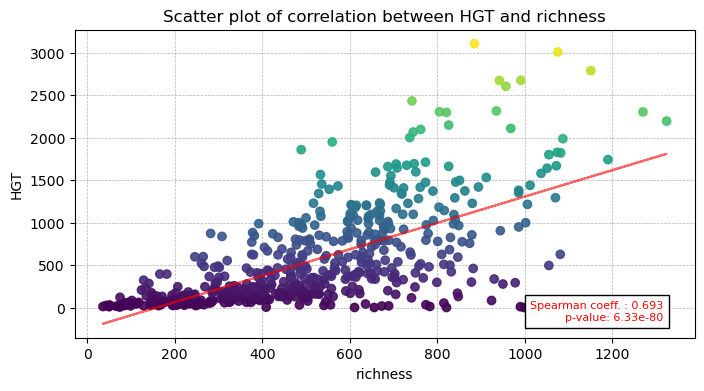

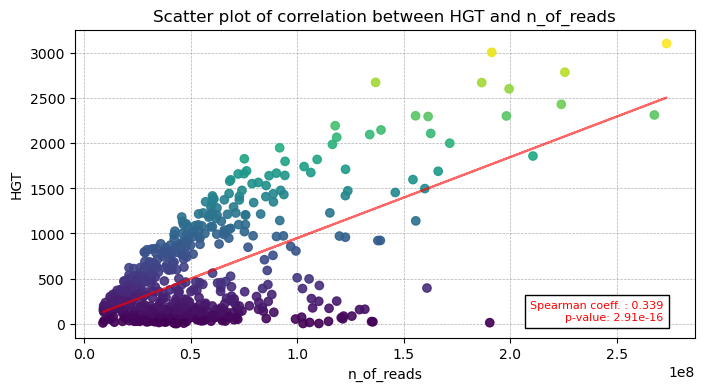

In [19]:
spearman_correlation_scatter(df, "HGT", "richness","small")
spearman_correlation_scatter(df, "HGT", "n_of_reads","small")

Correlation is positive, we have to normalize by sequencing depth (already done)

## 0) HGT distribution among samples normalized by richness and by depth

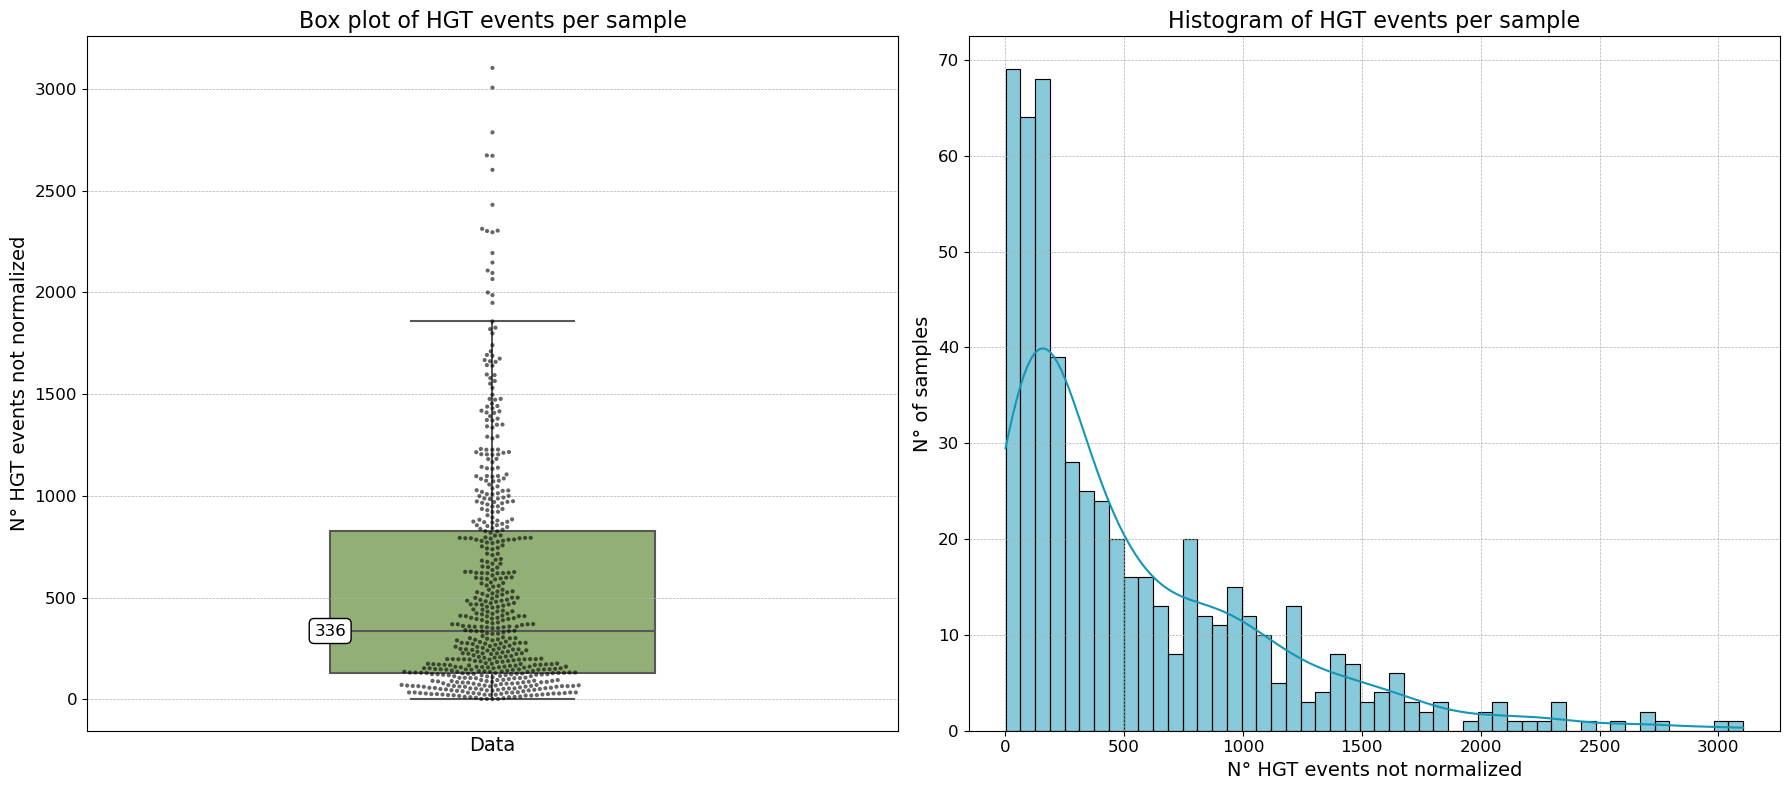

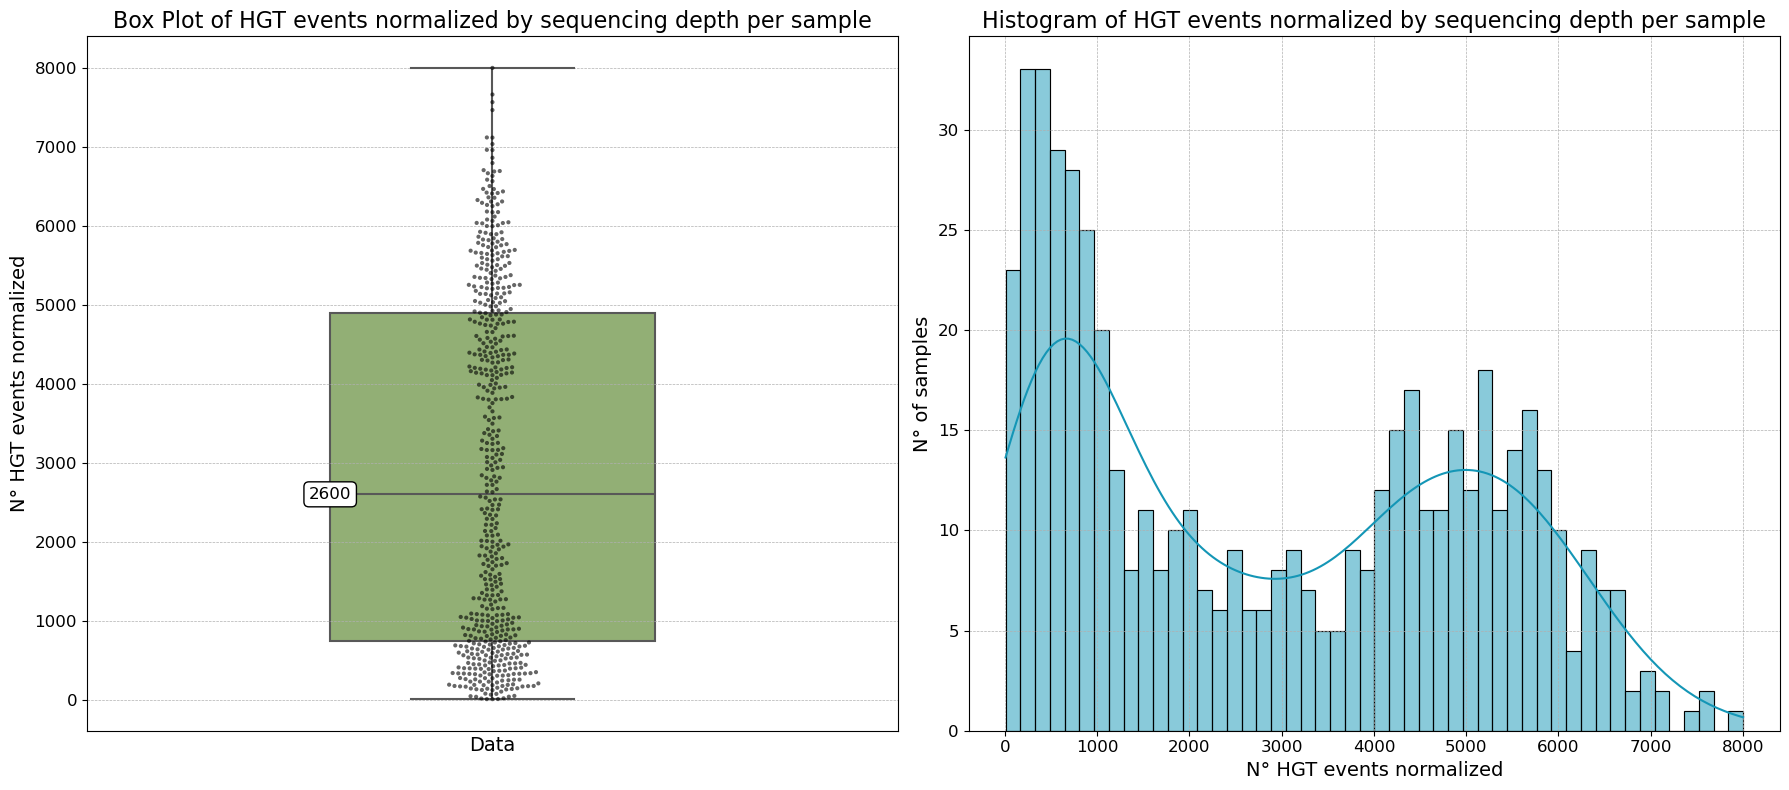

In [20]:
plot_box_swarm_and_histogram(df, 'HGT', 'Box plot of HGT events per sample', 'Histogram of HGT events per sample',states_color[0], states_color[1], 'N° HGT events not normalized', 'N° HGT events not normalized','N° of samples')
plot_box_swarm_and_histogram(df, 'HGT_depth', 'Box Plot of HGT events normalized by sequencing depth per sample', 'Histogram of HGT events normalized by sequencing depth per sample',states_color[0], states_color[1], 'N° HGT events normalized', 'N° HGT events normalized','N° of samples')

## 1) Distribution by country

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Tanzania v.s. Ghana: Mann-Whitney-Wilcoxon test two-sided, P_val=9.063e-01 U_stat=3.614e+04


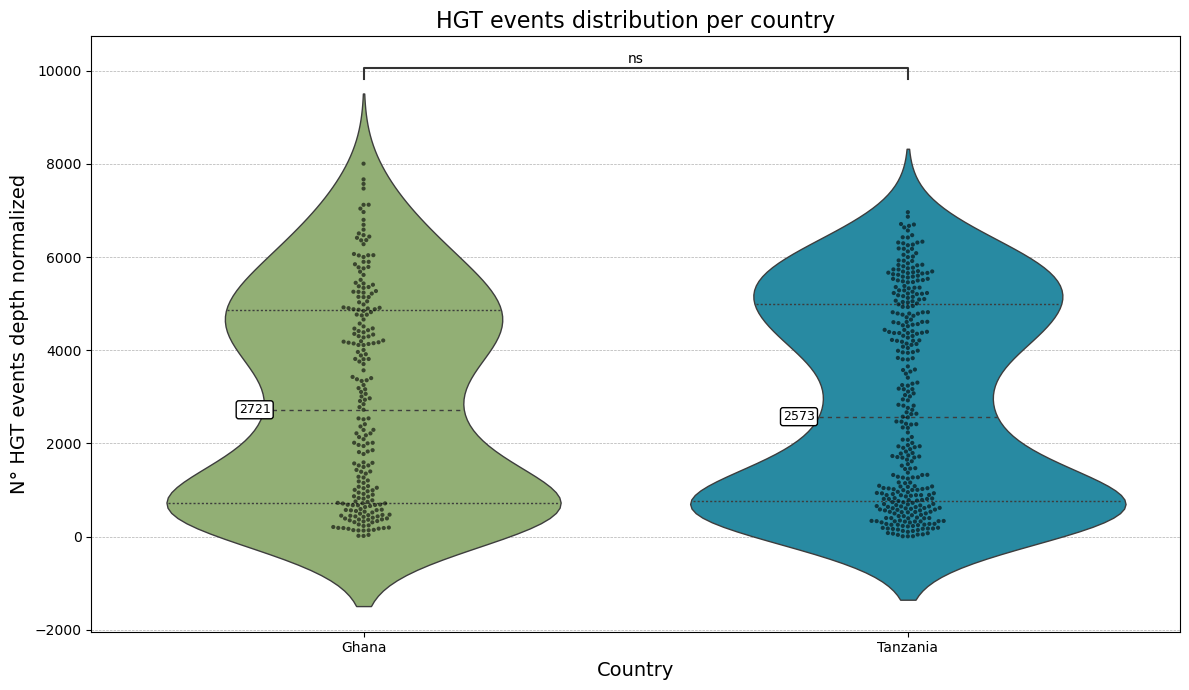

In [21]:
plot_violin_swarm_with_annotations(df, 'country', 'HGT_depth', 'HGT events distribution per country', 'Country', 'N° HGT events depth normalized', custom_order=["Ghana", "Tanzania"], palette=states_color, pairs=[('Ghana', 'Tanzania')])

In [22]:
print("Number of events in Ghana:",str(df_ghana["HGT"].sum()))
print("Number of events in Tanzania:",str(df_tanzania["HGT"].sum()))

Number of events in Ghana: 145341
Number of events in Tanzania: 154760


No difference between the two countries, we can analyze all togheter

## 2) Distribution of HGT events per sex divided by country

### - Statistical signifcance

In [23]:
MW_GH_sex_depth = mannwhitney(df_GH_males['HGT_depth'], df_GH_females['HGT_depth'])
MW_TZ_sex_depth = mannwhitney(df_TZ_males['HGT_depth'], df_TZ_females['HGT_depth'])
MW_sex_depth = mannwhitney(df_males['HGT_depth'], df_females['HGT_depth'])
print("Significance in sequencing depth between males and females")
print( "\t- males vs females Ghana:", MW_GH_sex_depth[1])
print( "\t- males vs females Tanzania:",MW_TZ_sex_depth[1])
print( "\t- males vs females:", MW_sex_depth[1])

Significance in sequencing depth between males and females
	- males vs females Ghana: 0.012906685989973984
	- males vs females Tanzania: 0.13697882789830157
	- males vs females: 0.010170714990897979


### - Confounder analysis

#### 1) Checking if richness correlates with sex

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

males_GH v.s. females_GH: Mann-Whitney-Wilcoxon test two-sided, P_val=8.163e-03 U_stat=3.050e+02
males_TZ v.s. females_TZ: Mann-Whitney-Wilcoxon test two-sided, P_val=9.222e-01 U_stat=1.930e+03
males v.s. females: Mann-Whitney-Wilcoxon test two-sided, P_val=1.182e-01 U_stat=4.002e+03


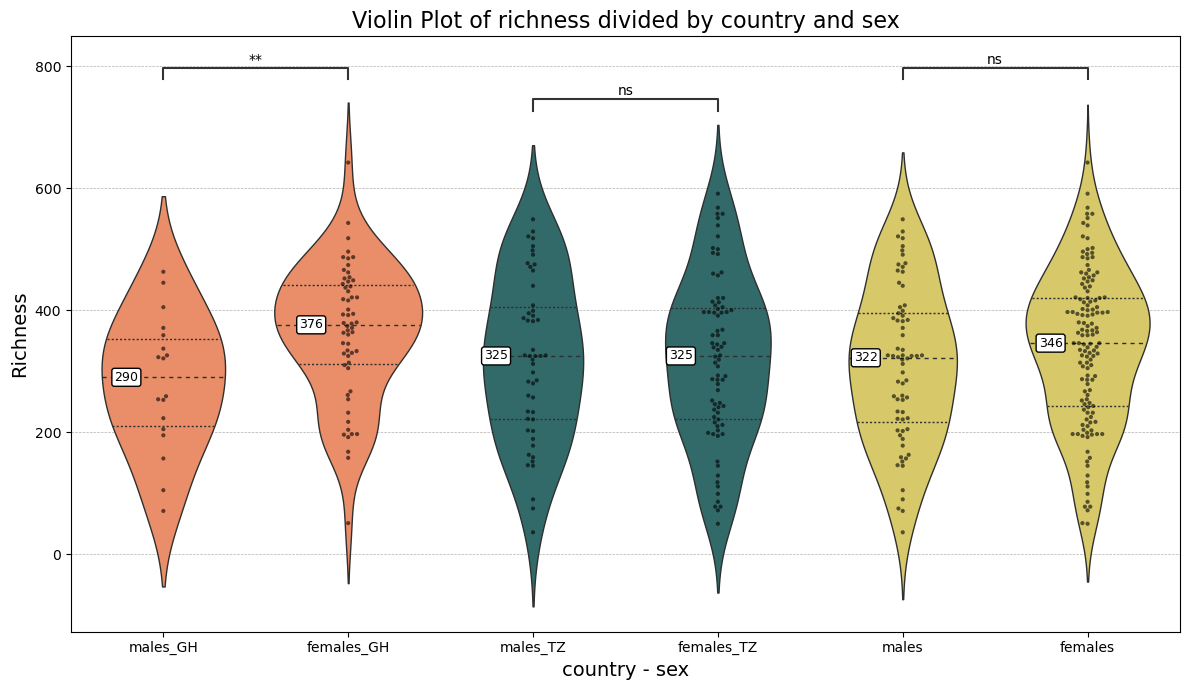

In [24]:
plot_violin_swarm_with_annotations(df_sex_plot, x='dataset', y='richness', title='Violin Plot of richness divided by country and sex', x_label='country - sex', y_label='Richness', custom_order=['males_GH', 'females_GH', 'males_TZ', 'females_TZ', 'males', 'females'], palette=sex_nation_colors,pairs=[("males_GH", "females_GH"), ("males_TZ", "females_TZ"), ("males", "females")])

#### 2) Confunder analysis with GLM models (HGT~sex) (HGT~sex+richness)

In [25]:
confounder_analysis(df_humans, 'HGT', 'sex', 'richness')

Null Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    HGT   No. Observations:                  204
Model:                            GLM   Df Residuals:                      202
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          11068.
Method:                          IRLS   Log-Likelihood:                -1238.3
Date:                Tue, 06 Aug 2024   Deviance:                   2.2357e+06
Time:                        17:08:52   Pearson chi2:                 2.24e+06
No. Iterations:                     3   Pseudo R-squ. (CS):            0.04879
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     164.8309      9.

/tmp/ipykernel_6600/1654002582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[primary_independent_var] = df[primary_independent_var].astype('category')


### - Plot

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

males_GH v.s. females_GH: Mann-Whitney-Wilcoxon test two-sided, P_val=1.291e-02 U_stat=3.180e+02
males_TZ v.s. females_TZ: Mann-Whitney-Wilcoxon test two-sided, P_val=1.370e-01 U_stat=1.645e+03
males v.s. females: Mann-Whitney-Wilcoxon test two-sided, P_val=1.017e-02 U_stat=3.602e+03


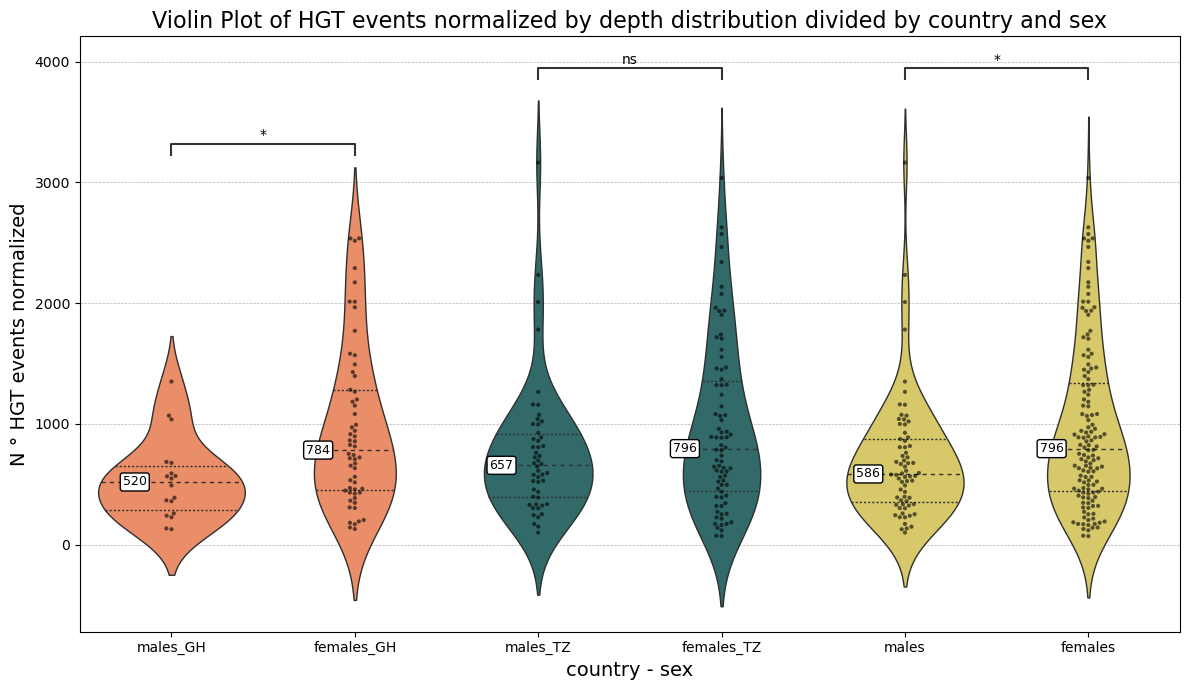

In [26]:
plot_violin_swarm_with_annotations(df_sex_plot, x='dataset', y='HGT_depth', title='Violin Plot of HGT events normalized by depth distribution divided by country and sex', x_label='country - sex', y_label='N ° HGT events normalized', custom_order=['males_GH', 'females_GH', 'males_TZ', 'females_TZ', 'males', 'females'], palette=sex_nation_colors,pairs=[("males_GH", "females_GH"), ("males_TZ", "females_TZ"), ("males", "females")])

## 3) Distribution of HGT events humans vs animals

### - Statistical signifcance

In [27]:
MW_HvsA_depth=mannwhitney(df_animals['HGT_depth'], df_humans['HGT_depth'])

print(MW_HvsA_depth)

MannwhitneyuResult(statistic=63931.0, pvalue=5.588505587260664e-57)


### - Confounder analysis

#### 1) Checking if richness correlates with binomial species

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

human v.s. animal: Mann-Whitney-Wilcoxon test two-sided, P_val=3.581e-46 U_stat=9.610e+03


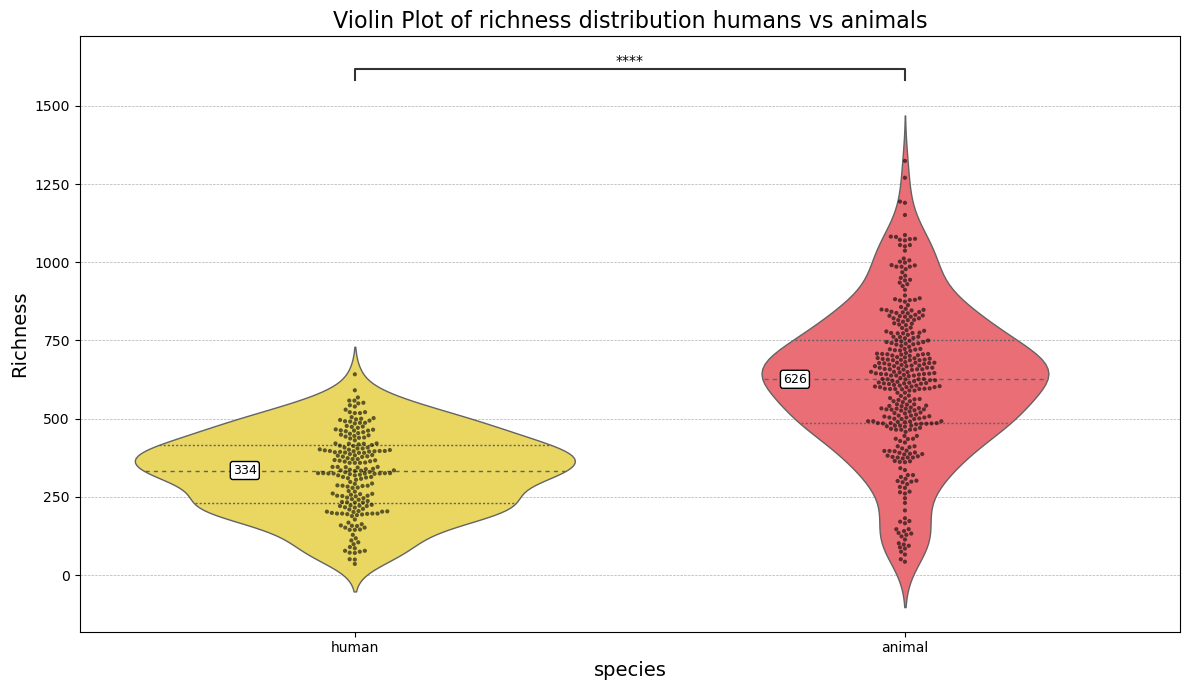

In [28]:
plot_violin_swarm_with_annotations(df_binomial_species, x='species', y='richness', title='Violin Plot of richness distribution humans vs animals', x_label='species', y_label='Richness', custom_order=["human","animal"],  palette=humans_animals_colors, pairs=[("human", "animal")])

#### 2) Confunder analysis with GLM models (HGT(depth)~species) (HGT(depth)~species+richness)

In [29]:
confounder_analysis(df_binomial_species, 'HGT', 'species', 'richness')

Null Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    HGT   No. Observations:                  550
Model:                            GLM   Df Residuals:                      548
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                      2.3018e+05
Method:                          IRLS   Log-Likelihood:                -4174.7
Date:                Tue, 06 Aug 2024   Deviance:                   1.2614e+08
Time:                        17:08:54   Pearson chi2:                 1.26e+08
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3328
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          7

In [30]:
confounder_analysis(df_binomial_species, 'HGT', 'richness', 'species')

Null Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    HGT   No. Observations:                  550
Model:                            GLM   Df Residuals:                      139
Model Family:                Gaussian   Df Model:                          410
Link Function:               Identity   Scale:                      1.1538e+05
Method:                          IRLS   Log-Likelihood:                -3607.6
Date:                Tue, 06 Aug 2024   Deviance:                   1.6038e+07
Time:                        17:08:58   Pearson chi2:                 1.60e+07
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9580
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

### - Plot

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

animal v.s. human: Mann-Whitney-Wilcoxon test two-sided, P_val=5.589e-57 U_stat=6.393e+04


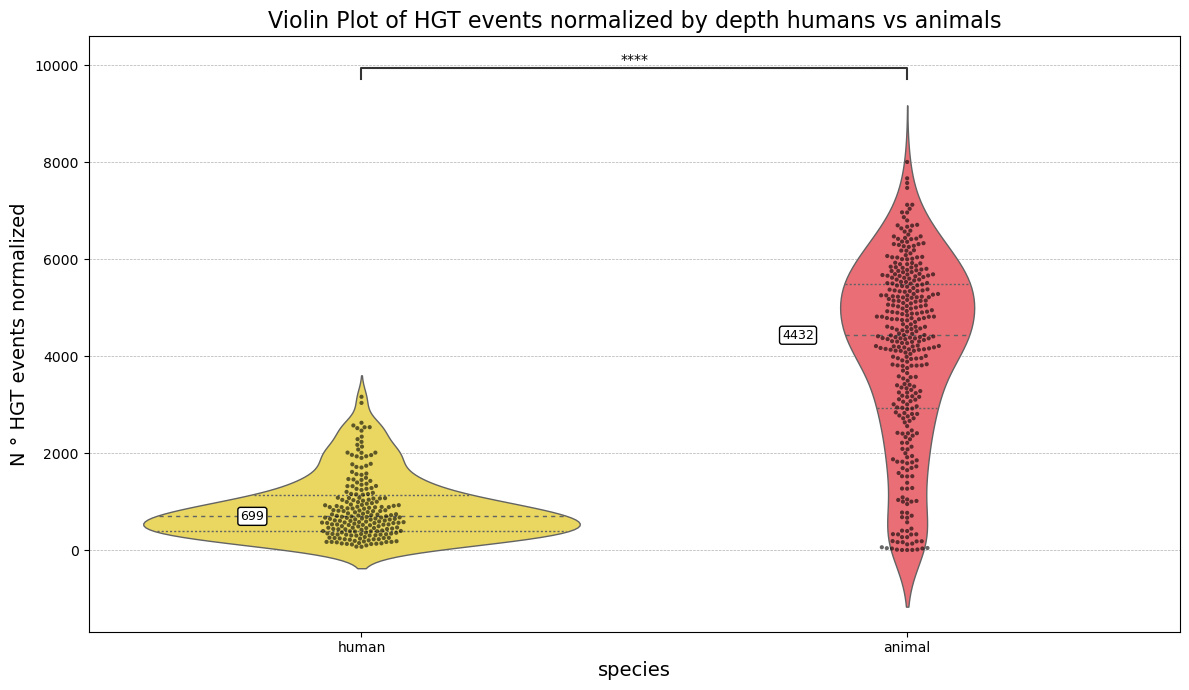

In [31]:
plot_violin_swarm_with_annotations(df_binomial_species, x='species', y='HGT_depth', title='Violin Plot of HGT events normalized by depth humans vs animals', x_label='species', y_label='N ° HGT events normalized', custom_order=["human","animal"],  palette=humans_animals_colors, pairs=[("human", "animal")])

## 4) Distribution of HGT events per species

### - Statistical signifcance

In [32]:
groups = [df_humans,df_dogs,df_cows,df_goats,df_sheeps]
names_list=["humans","dogs","cows","goats","sheeps"]

dunn_species_richness=perform_kruskal_dunn(groups,"richness",names_list)
dunn_species_depth=perform_kruskal_dunn(groups,"HGT_depth",names_list)

Kruskal-Wallis test result: H-statistic = 246.74984950301192, p-value = 3.2635014214400796e-52
Kruskal-Wallis test is significant, performing Dunn test...
Significant Dunn test results (Bonferroni corrected):
              1         2             3             4             5
1           NaN       NaN  3.194751e-45  1.547828e-23  6.574153e-12
2           NaN       NaN  1.532076e-06  4.527743e-04  1.294167e-04
3  3.194751e-45  0.000002           NaN  2.945644e-05           NaN
4  1.547828e-23  0.000453  2.945644e-05           NaN           NaN
5  6.574153e-12  0.000129           NaN           NaN           NaN
humans cows 3.1947507849944286e-45
humans goats 1.5478280806714753e-23
humans sheeps 6.574153269307059e-12
dogs cows 1.5320763146672112e-06
dogs goats 0.00045277427909069486
dogs sheeps 0.00012941674966082984
cows goats 2.9456438554749435e-05
Kruskal-Wallis test result: H-statistic = 268.2818381102759, p-value = 7.483864660380011e-57
Kruskal-Wallis test is significant, performing 

### - Confounder analysis

#### 1) Checking if richness correlates with species

[('cow', 'human'), ('goat', 'human'), ('sheep', 'human'), ('cow', 'dog'), ('goat', 'dog'), ('sheep', 'dog'), ('goat', 'cow')]
[3.1947507849944286e-45, 1.5478280806714753e-23, 6.574153269307059e-12, 1.5320763146672112e-06, 0.00045277427909069486, 0.00012941674966082984, 2.9456438554749435e-05]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dog v.s. cow: Custom statistical test, P_val:1.532e-06
cow v.s. goat: Custom statistical test, P_val:2.946e-05
human v.s. cow: Custom statistical test, P_val:3.195e-45
dog v.s. goat: Custom statistical test, P_val:4.528e-04
human v.s. goat: Custom statistical test, P_val:1.548e-23
dog v.s. sheep: Custom statistical test, P_val:1.294e-04
human v.s. sheep: Custom statistical test, P_val:6.574e-12


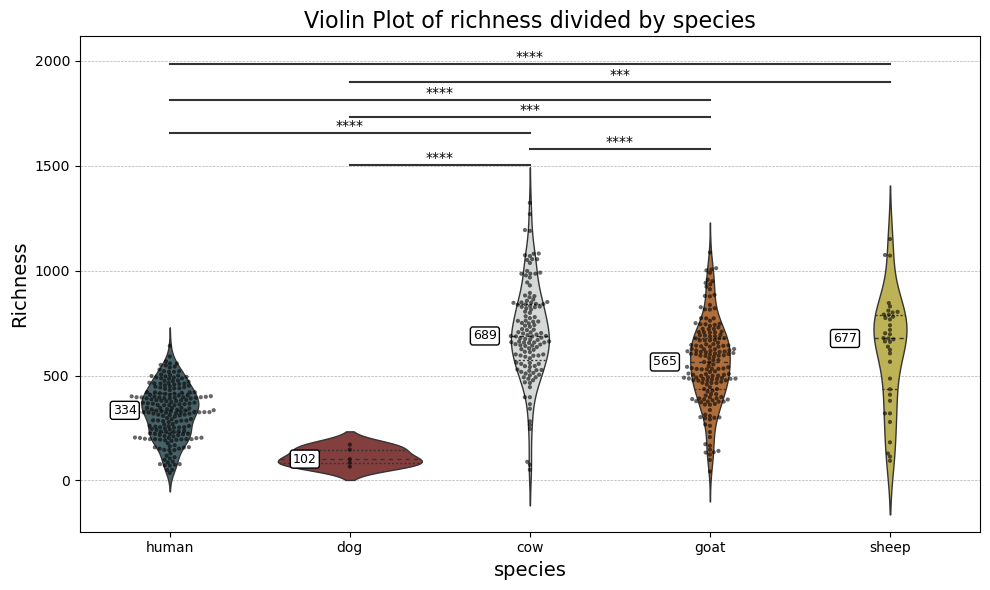

In [33]:
plot_violin_swarm_with_annotations_animals(df_all_species, x='species', y='richness', significant_results=dunn_species_richness, title='Violin Plot of richness divided by species', x_label='species', y_label='Richness', custom_order = ["human", "dog",  "cow","goat", "sheep"], palette=species_colors,names=["human","dog","cow","goat","sheep"])

#### 2) Confunder analysis with GLM models (HGT~species) (HGT~species+richness)

In [34]:
confounder_analysis(df_all_species, 'HGT', 'species', 'richness')

Null Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    HGT   No. Observations:                  550
Model:                            GLM   Df Residuals:                      545
Model Family:                Gaussian   Df Model:                            4
Link Function:               Identity   Scale:                      2.2524e+05
Method:                          IRLS   Log-Likelihood:                -4167.3
Date:                Tue, 06 Aug 2024   Deviance:                   1.2276e+08
Time:                        17:09:00   Pearson chi2:                 1.23e+08
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3565
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          7

### - Plot

[('cow', 'human'), ('goat', 'human'), ('sheep', 'human'), ('cow', 'dog'), ('goat', 'dog'), ('sheep', 'dog')]
[4.488422333069428e-33, 5.493219953417069e-47, 3.3136114121702975e-12, 0.00607495580054939, 0.0017268993246192682, 0.01636415227799892]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dog v.s. cow: Custom statistical test, P_val:6.075e-03
human v.s. cow: Custom statistical test, P_val:4.488e-33
dog v.s. goat: Custom statistical test, P_val:1.727e-03
human v.s. goat: Custom statistical test, P_val:5.493e-47
dog v.s. sheep: Custom statistical test, P_val:1.636e-02
human v.s. sheep: Custom statistical test, P_val:3.314e-12


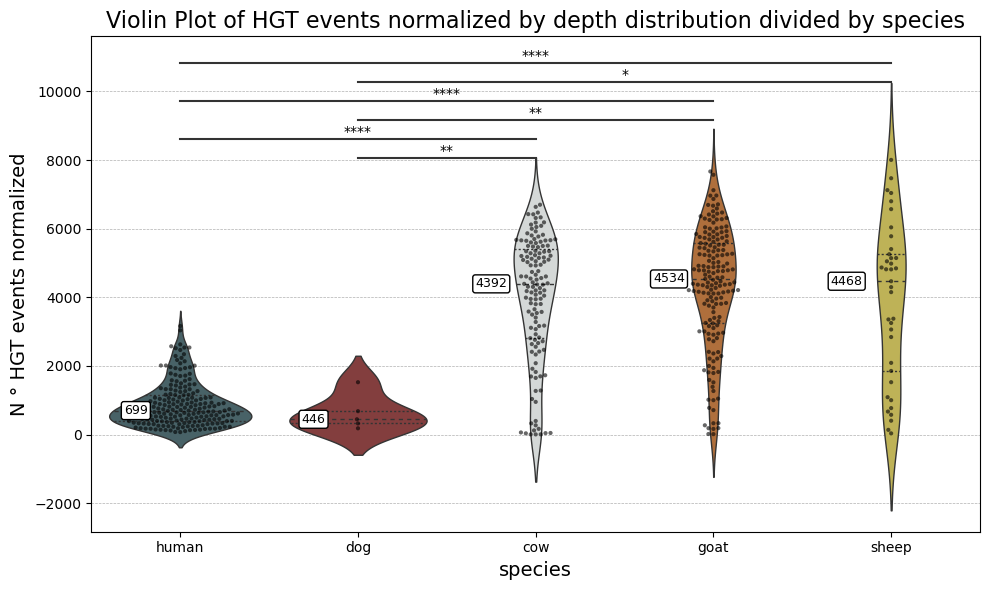

In [35]:
plot_violin_swarm_with_annotations_animals(df_all_species, x='species', y='HGT_depth', significant_results=dunn_species_depth, title='Violin Plot of HGT events normalized by depth distribution divided by species', x_label='species', y_label='N ° HGT events normalized', custom_order = ["human", "dog",  "cow","goat", "sheep"], palette=species_colors,names=["human","dog","cow","goat","sheep"])

## 5) Distribution of HGT events per family role

### - Statistical signifcance

In [36]:
groups = [df_mother,df_father,df_sibling,df_grandmother,df_grandfather, df_aunt, df_uncle, df_cousin]
names_list=["mothers","fathers","siblings","grandmothers","grandfathers","aunts","uncles","cousins"]
dunn_family_depth=perform_kruskal_dunn(groups,"HGT_depth",names_list)

Kruskal-Wallis test result: H-statistic = 38.079189159243924, p-value = 2.9269206267325805e-06
Kruskal-Wallis test is significant, performing Dunn test...
Significant Dunn test results (Bonferroni corrected):
          1         2         3         4   5   6   7         8
1       NaN       NaN  0.014923       NaN NaN NaN NaN       NaN
2       NaN       NaN       NaN  0.000945 NaN NaN NaN       NaN
3  0.014923       NaN       NaN  0.000012 NaN NaN NaN       NaN
4       NaN  0.000945  0.000012       NaN NaN NaN NaN  0.008305
5       NaN       NaN       NaN       NaN NaN NaN NaN       NaN
6       NaN       NaN       NaN       NaN NaN NaN NaN       NaN
7       NaN       NaN       NaN       NaN NaN NaN NaN       NaN
8       NaN       NaN       NaN  0.008305 NaN NaN NaN       NaN
mothers siblings 0.014923270151889113
fathers grandmothers 0.0009447761745457668
siblings grandmothers 1.1622661164073973e-05
grandmothers cousins 0.00830450709799866


### - Confounder analysis
skipped because there family role is result of age and sex

### - Plot

[('sibling', 'mother'), ('grandmother', 'father'), ('grandmother', 'sibling'), ('cousin', 'grandmother')]
[0.014923270151889113, 0.0009447761745457668, 1.1622661164073973e-05, 0.00830450709799866]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

sibling v.s. grandmother: Custom statistical test, P_val:1.162e-05
mother v.s. sibling: Custom statistical test, P_val:1.492e-02
father v.s. grandmother: Custom statistical test, P_val:9.448e-04
grandmother v.s. cousin: Custom statistical test, P_val:8.305e-03


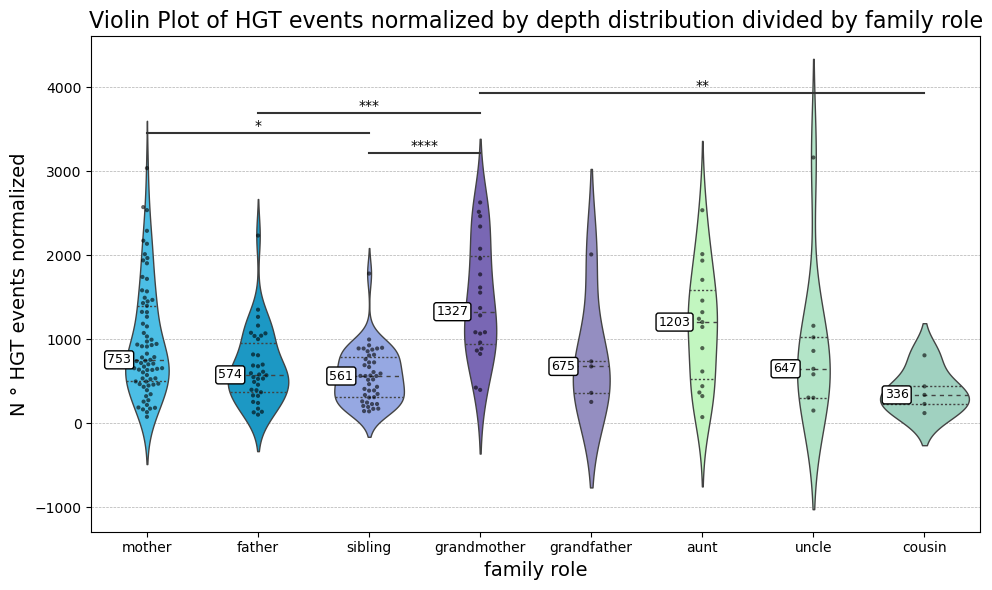

In [37]:
plot_violin_swarm_with_annotations_animals(df_family_role, x='family_role', y='HGT_depth', significant_results=dunn_family_depth, title='Violin Plot of HGT events normalized by depth distribution divided by family role', x_label='family role', y_label='N ° HGT events normalized', custom_order = ["mother", "father",  "sibling","grandmother", "grandfather","aunt","uncle","cousin"], palette=family_colors, names = ["mother", "father",  "sibling","grandmother", "grandfather","aunt","uncle","cousin"])

## 6) Distribution of HGT events by age

### - Statistical significance

In [38]:
groups = [df_newborn, df_child, df_schoolage, df_adult, df_senior]
names_list=["newborns","children","schoolage","adults","seniors"]

dunn_age_depth=perform_kruskal_dunn(groups,"HGT_depth",names_list)

Kruskal-Wallis test result: H-statistic = 29.888292550100232, p-value = 5.157521012316614e-06
Kruskal-Wallis test is significant, performing Dunn test...
Significant Dunn test results (Bonferroni corrected):
    1         2   3         4         5
1 NaN       NaN NaN       NaN       NaN
2 NaN       NaN NaN  0.000014  0.033063
3 NaN       NaN NaN       NaN       NaN
4 NaN  0.000014 NaN       NaN       NaN
5 NaN  0.033063 NaN       NaN       NaN
children adults 1.4444285802102209e-05
children seniors 0.033062645745258426


### - Confunder analysis

#### 1) Checking if richness correlates with age

In [39]:
groups = [df_newborn, df_child, df_schoolage, df_adult, df_senior]
names_list=["newborns","children","schoolage","adults","seniors"]
dunn_age_richness=perform_kruskal_dunn(groups,"richness",names_list)

Kruskal-Wallis test result: H-statistic = 12.552088542538604, p-value = 0.013684972772611567
Kruskal-Wallis test is significant, performing Dunn test...
Significant Dunn test results (Bonferroni corrected):
    1   2   3   4   5
1 NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN
4 NaN NaN NaN NaN NaN
5 NaN NaN NaN NaN NaN


In this case the difference in richness distribution is not significant, this means that we can skip the confunder analysis

### - Plot

[('adult', 'child'), ('senior', 'child')]
[1.4444285802102209e-05, 0.033062645745258426]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

child v.s. adult: Custom statistical test, P_val:1.444e-05
child v.s. senior: Custom statistical test, P_val:3.306e-02


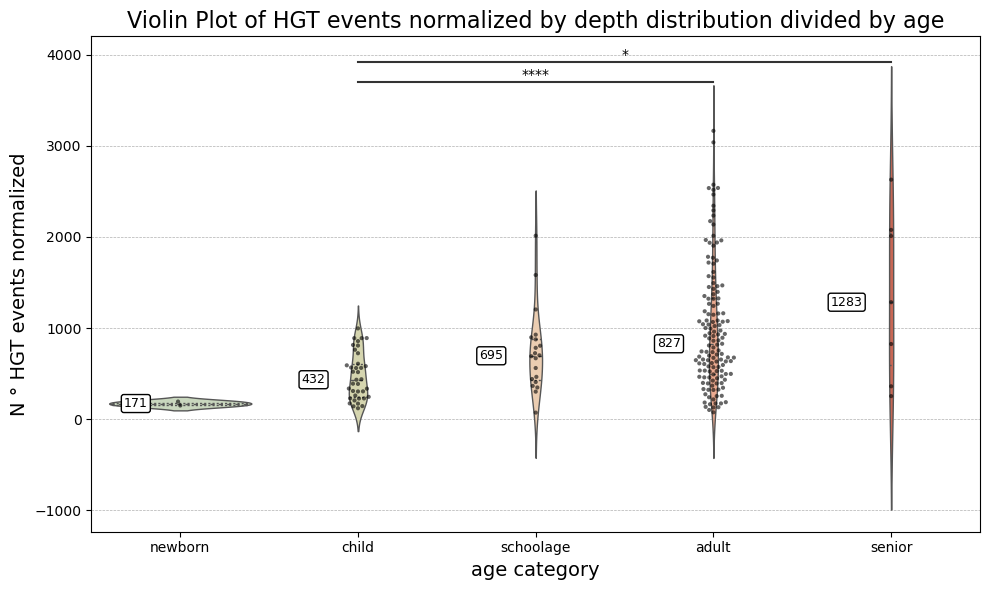

In [40]:
plot_violin_swarm_with_annotations_animals(df_age, x='dataset', y='HGT_depth', significant_results=dunn_age_depth, title='Violin Plot of HGT events normalized by depth distribution divided by age', x_label='age category', y_label='N ° HGT events normalized', custom_order = ["newborn","child","schoolage","adult","senior"], palette=age_colors, names = ["newborn","child","schoolage","adult","senior"])

### - Age as a continuum

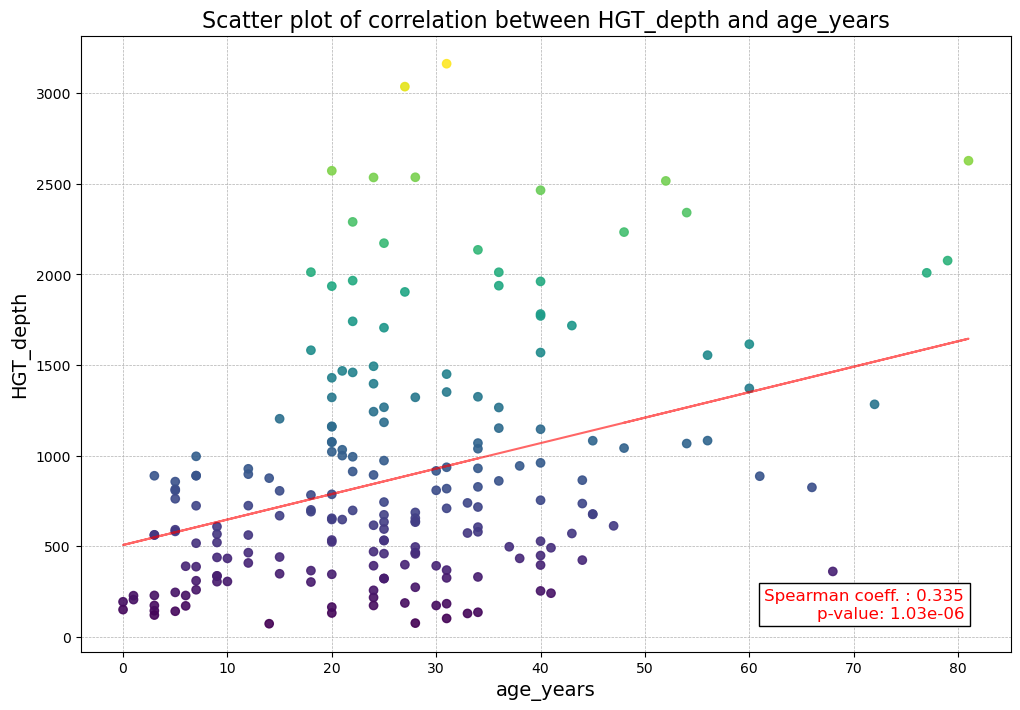

In [41]:
df_humans_copy2=df_humans.copy()
df_humans_copy2.dropna(subset = ["age_years"], inplace=True)
spearman_correlation_scatter(df_humans_copy2, "HGT_depth", "age_years", "big")

# **Genetic analysis**

## 0) Extraxt LCAs, species and genus pairs

In [18]:
# Initialize empy dataframes
df_LCA_raw=pd.DataFrame()
df_top_species_raw=pd.DataFrame()
df_top_genus_raw=pd.DataFrame()
df_top_pairs_raw=pd.DataFrame()
df_gene_raw=pd.DataFrame()
df_gene_uniclust_raw=pd.DataFrame()
df_gene_uniref_raw=pd.DataFrame()
df_top_donor_raw=pd.DataFrame()
df_top_recipient_raw=pd.DataFrame()
df_genes_same_event=pd.DataFrame()
df_top_strains_raw=pd.DataFrame()
#Initialize lists to hold species, genus, lcas and species-pairs
species=[]
genus=[]
lcas=[]
pairs=[]
gene_list_uniref=[]
gene_list_uniclust=[]
gene_list=[]
donor=[]
recipient=[]
same_events=[]
strains=[]
#Initialize count for samples with incomplete taxonomy
total_events=0
analyzed_event=0
events_no_full_tax=0
events_no_full_tax_after_meld=0
total_events_w_analyzed_genes=0
total_analyzed_genes=0
total_analyzed_genes_uniref=0
total_analyzed_genes_uniclust=0
no_direction=0

# Retrieve all the samples id
samples=df["sampleID"].to_list()
      
for sample in samples:
    with open(f"/home/giacomo/Thesis-Internship/waafle/data_qc/{sample}.qc.lgt.tsv", "r") as infile:
        #Skip first line
        next(infile)
        
        for line in infile:
            #Add to total events count
            total_events+=1
            
            #strip line
            line=line.rstrip()
            
            #Extract order
            order=line.split("\t")[5]
            
            #Extract direction
            direction=line.split("\t")[6]
            
            #Extract LCA
            lca=line.split("\t")[9]
            
            #Extract tax1 and tax2
            tax1=line.split("\t")[12].split("|")
            tax2=line.split("\t")[13].split("|")
            
            #Extract meld1 and meld2. Only the first meld option is stored
            meld1=line.split("\t")[10].split(";")[0].split("|")
            meld2=line.split("\t")[11].split(";")[0].split("|")
            
            #Extract genes codes
            uniclust=line.split("\t")[15].split("|")
            uniref=line.split("\t")[16].split("|")

            #Exclude all the events in which at least one tax that have incomplete taxonomy (tax len less than 10)
            if len (tax1)!=10 or len (tax2)!=10:
                events_no_full_tax+=1
                
                #Check direction: if it is defined extract the genes, if not try to assume it
                if direction == "A>B":
                    
                    if len (tax1)==8 and len (tax2)==8:
                        donor.append(tax1[7])
                        recipient.append(tax2[7])
                    
                    gene_same_event=[]
                    #Go trough the order and extract the genes
                    for n in range(len(order)):
                        
                        #Extract genes A from uniclust if uniref is not available
                        if order[n]=="A":
                            if uniref[n]=="None":
                                gene_list_uniclust.append(uniclust[n])
                                
                                total_analyzed_genes+=1
                                total_analyzed_genes_uniclust+=1
                            else:
                                gene_list_uniref.append(uniref[n])
                                gene_same_event.append(uniref[n])
                                total_analyzed_genes+=1
                                total_analyzed_genes_uniref+=1
                    same_events.append(gene_same_event)
                    total_events_w_analyzed_genes+=1
                    
                elif direction == "B>A":
                    
                    if len (tax1)==8 and len (tax2)==8:
                        donor.append(tax2[7])
                        recipient.append(tax1[7])
                    
                    gene_same_event=[]    
                    #Go trough the order and extract the genes
                    for n in range(len(order)):
                        
                        #Extract genes A from uniclust if uniref is not available
                        if order[n]=="B":
                            if uniref[n]=="None":
                                gene_list_uniclust.append(uniclust[n])
                                
                                total_analyzed_genes+=1
                                total_analyzed_genes_uniclust+=1
                            else:
                                gene_list_uniref.append(uniref[n])
                                gene_same_event.append(uniref[n])
                                total_analyzed_genes+=1
                                total_analyzed_genes_uniref+=1
                    same_events.append(gene_same_event)
                    total_events_w_analyzed_genes+=1
                
                else:
                    
                    #Count the number of A and B in the order
                    A=order.count("A")
                    B=order.count("B")
                    
                    #Set a threshold to decide the direction: if the amount of A/B is less than 30% of the entire sequence assume it's the donor
                    threshold = 0.3
                    
                    if (B/len(order)) <= threshold:
                        if len (tax1)==8 and len (tax2)==8:
                            donor.append(tax2[7])
                            recipient.append(tax1[7])
                        gene_same_event=[]  
                        #Go trough the order and extract the genes
                        for n in range(len(order)):
                            if order[n]=="B": 
                                if uniref[n]=="None":
                                    gene_list_uniclust.append(uniclust[n])
                                    
                                    total_analyzed_genes+=1
                                    total_analyzed_genes_uniclust+=1
                                else:
                                    gene_list_uniref.append(uniref[n])
                                    gene_same_event.append(uniref[n])
                                    total_analyzed_genes+=1
                                    total_analyzed_genes_uniref+=1
                        same_events.append(gene_same_event)
                        total_events_w_analyzed_genes+=1
                    
                    elif (A/len(order)) <= threshold:
                        if len (tax1)==8 and len (tax2)==8:
                            donor.append(tax1[7])
                            recipient.append(tax2[7])
                        gene_same_event=[] 
                        #Go trough the order and extract the genes
                        for n in range(len(order)):
                            if order[n]=="A":
                                if uniref[n]=="None":
                                    gene_list_uniclust.append(uniclust[n])
                                    
                                    total_analyzed_genes+=1
                                    total_analyzed_genes_uniclust+=1
                                else:
                                    gene_list_uniref.append(uniref[n])
                                    gene_same_event.append(uniref[n])
                                    total_analyzed_genes+=1
                                    total_analyzed_genes_uniref+=1
                        same_events.append(gene_same_event)
                        total_events_w_analyzed_genes+=1  
                    else:
                        
                        #If the direction is unclear and not assumable append "unclear direction"
                        gene_list.append("unclear_direction")
                        no_direction+=1
                continue
                # #Try to recover full tax path with meld
                # if meld1[0]!="--":
                #     tax1.extend(meld1)
                # if meld2[0]!="--":
                #     tax2.extend(meld2)
                # if len (tax1)!=10 or len (tax2)!=10:
                #     events_no_full_tax_after_meld+=1
                #     continue
            
            #Check direction: if it is defined extract the genes, if not try to assume it
            if direction == "A>B":
                    
                    
                donor.append(tax1[7])
                recipient.append(tax2[7])
                
                gene_same_event=[]
                #Go trough the order and extract the genes
                for n in range(len(order)):
                    
                    #Extract genes A from uniclust if uniref is not available
                    if order[n]=="A":
                        if uniref[n]=="None":
                            gene_list_uniclust.append(uniclust[n])
                            
                            total_analyzed_genes+=1
                            total_analyzed_genes_uniclust+=1
                        else:
                            gene_list_uniref.append(uniref[n])
                            gene_same_event.append(uniref[n])
                            total_analyzed_genes+=1
                            total_analyzed_genes_uniref+=1
                same_events.append(gene_same_event)
                total_events_w_analyzed_genes+=1
                
            elif direction == "B>A":
                
                if len (tax1)==8 and len (tax2)==8:
                    donor.append(tax2[7])
                    recipient.append(tax1[7])
                
                gene_same_event=[]    
                #Go trough the order and extract the genes
                for n in range(len(order)):
                    
                    #Extract genes A from uniclust if uniref is not available
                    if order[n]=="B":
                        if uniref[n]=="None":
                            gene_list_uniclust.append(uniclust[n])
                            
                            total_analyzed_genes+=1
                            total_analyzed_genes_uniclust+=1
                        else:
                            gene_list_uniref.append(uniref[n])
                            gene_same_event.append(uniref[n])
                            total_analyzed_genes+=1
                            total_analyzed_genes_uniref+=1
                same_events.append(gene_same_event)
                total_events_w_analyzed_genes+=1
            
            else:
                
                #Count the number of A and B in the order
                A=order.count("A")
                B=order.count("B")
                
                #Set a threshold to decide the direction: if the amount of A/B is less than 30% of the entire sequence assume it's the donor
                threshold = 0.3
                
                if (B/len(order)) <= threshold:
                    if len (tax1)==8 and len (tax2)==8:
                        donor.append(tax2[7])
                        recipient.append(tax1[7])
                    gene_same_event=[]  
                    #Go trough the order and extract the genes
                    for n in range(len(order)):
                        if order[n]=="B": 
                            if uniref[n]=="None":
                                gene_list_uniclust.append(uniclust[n])
                                
                                total_analyzed_genes+=1
                                total_analyzed_genes_uniclust+=1
                            else:
                                gene_list_uniref.append(uniref[n])
                                gene_same_event.append(uniref[n])
                                total_analyzed_genes+=1
                                total_analyzed_genes_uniref+=1
                    same_events.append(gene_same_event)
                    total_events_w_analyzed_genes+=1
                
                elif (A/len(order)) <= threshold:
                    if len (tax1)==8 and len (tax2)==8:
                        donor.append(tax1[7])
                        recipient.append(tax2[7])
                    gene_same_event=[] 
                    #Go trough the order and extract the genes
                    for n in range(len(order)):
                        if order[n]=="A":
                            if uniref[n]=="None":
                                gene_list_uniclust.append(uniclust[n])
                                
                                total_analyzed_genes+=1
                                total_analyzed_genes_uniclust+=1
                            else:
                                gene_list_uniref.append(uniref[n])
                                gene_same_event.append(uniref[n])
                                total_analyzed_genes+=1
                                total_analyzed_genes_uniref+=1
                    same_events.append(gene_same_event)
                    total_events_w_analyzed_genes+=1  
                else:
                    
                    #If the direction is unclear and not assumable append "unclear direction"
                    gene_list.append("unclear_direction")
                    no_direction+=1
            
            strains.append(tax1[8])
            strains.append(tax2[8])                                
            species.append(tax1[7])
            species.append(tax2[7])
            lcas.append(lca)
            pair=str(tax1[7])+"-"+str(tax2[7])
            inverse_pair=str(tax2[7])+"-"+str(tax1[7])
            if inverse_pair in pairs:
                pairs.append(inverse_pair)
            else:
                pairs.append(pair)
                
            analyzed_event+=1   
             
print(f"In total there are {total_events} total events, corresponding to {total_events*2} species. {events_no_full_tax} events have at least 1 entry with incomplete taxonomy (taxonomy stopped before reaching strain level).")
print(f"Of these {events_no_full_tax} events, after reconstructing the full taxonomy with melding if available, {events_no_full_tax_after_meld} continue to have incomplete taxonomy. These events are skipped.")
print(f"In total {analyzed_event} events have been analyzed for species, genus and LCA")
print(f"Of these {total_events}, {total_events_w_analyzed_genes} events have been analyzed for gene content. For {no_direction} events it was impossible to assume directionality. In total, {total_analyzed_genes} genes have been analyzed, of which {total_analyzed_genes_uniclust} with Uniclust and {total_analyzed_genes_uniref} with Uniref.")

gene_list.extend(gene_list_uniref)
gene_list.extend(gene_list_uniclust)

df_top_strains_raw["tax"]=strains
df_top_donor_raw["tax"]=donor 
df_top_recipient_raw["tax"]=recipient
df_top_species_raw["tax"]=species
df_top_genus_raw["tax"]=genus
df_LCA_raw["LCA"]=lcas
df_top_pairs_raw["pair"]=pairs
df_gene_raw["gene"]=gene_list
df_gene_uniclust_raw["gene"]=gene_list_uniclust
df_gene_uniref_raw["gene"]=gene_list_uniref
df_genes_same_event["genes"]=same_events

In total there are 300101 total events, corresponding to 600202 species. 91915 events have at least 1 entry with incomplete taxonomy (taxonomy stopped before reaching strain level).
Of these 91915 events, after reconstructing the full taxonomy with melding if available, 0 continue to have incomplete taxonomy. These events are skipped.
In total 208186 events have been analyzed for species, genus and LCA
Of these 300101, 69749 events have been analyzed for gene content. For 230352 events it was impossible to assume directionality. In total, 84041 genes have been analyzed, of which 65487 with Uniclust and 18554 with Uniref.


## 1) LCA analysis

### - Most frequent LCAs

In [43]:
df_LCA=df_LCA_raw.value_counts().rename_axis('LCA').reset_index(name='count')
df_LCA.head(10)

,LCA,count
0,p__Firmicutes,52283
1,f__Oscillospiraceae,20458
2,k__Bacteria,14807
3,p__Bacteroidota,12773
4,f__FGB50354,6359
5,o__Eubacteriales,5575
6,f__Lachnospiraceae,5484
7,f__FGB56395,2460
8,f__FGB37155,2314
9,f__FGB1765,2241


### - LCAs per taxonomic level

In [44]:
# Iterate through the rows and check for the specific code
tax=["Root","Kingdom","Phylum","Class","Order","Family","Genus","Species","undefined"]
k=0
p=0
c=0
o=0
f=0
g=0
s=0
r=0
t=0
l=[]
for index, row in df_LCA.iterrows():
    if "k__" in row['LCA']:
        k+=row["count"]
    elif "p__" in row['LCA']:
        p+=row["count"]
    elif "c__" in row['LCA']:
        c+=row["count"]
    elif "o__" in row['LCA']:
        o+=row["count"]
    elif "f__" in row['LCA']:
        f+=row["count"]
    elif "g__" in row['LCA']:
        g+=row["count"]
    elif "s__" in row['LCA']:
        s+=row["count"]
    elif "r__" in row['LCA']:
        r+=row["count"]
    else:
        t+=row["count"]
l.append(r)
l.append(k)
l.append(p)
l.append(c)
l.append(o)
l.append(f)
l.append(g)
l.append(s)
l.append(t)

df_clades=pd.DataFrame(columns=["level","count"])
df_clades["level"]=tax
df_clades["count"]=l
df_clades

,level,count
0,Root,697
1,Kingdom,14807
2,Phylum,67579
3,Class,173
4,Order,6625
5,Family,83812
6,Genus,33776
7,Species,717
8,undefined,0


### - LCAs distribution per clade

/tmp/ipykernel_6600/1177064877.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(df[level_col], rotation=45, ha='right')


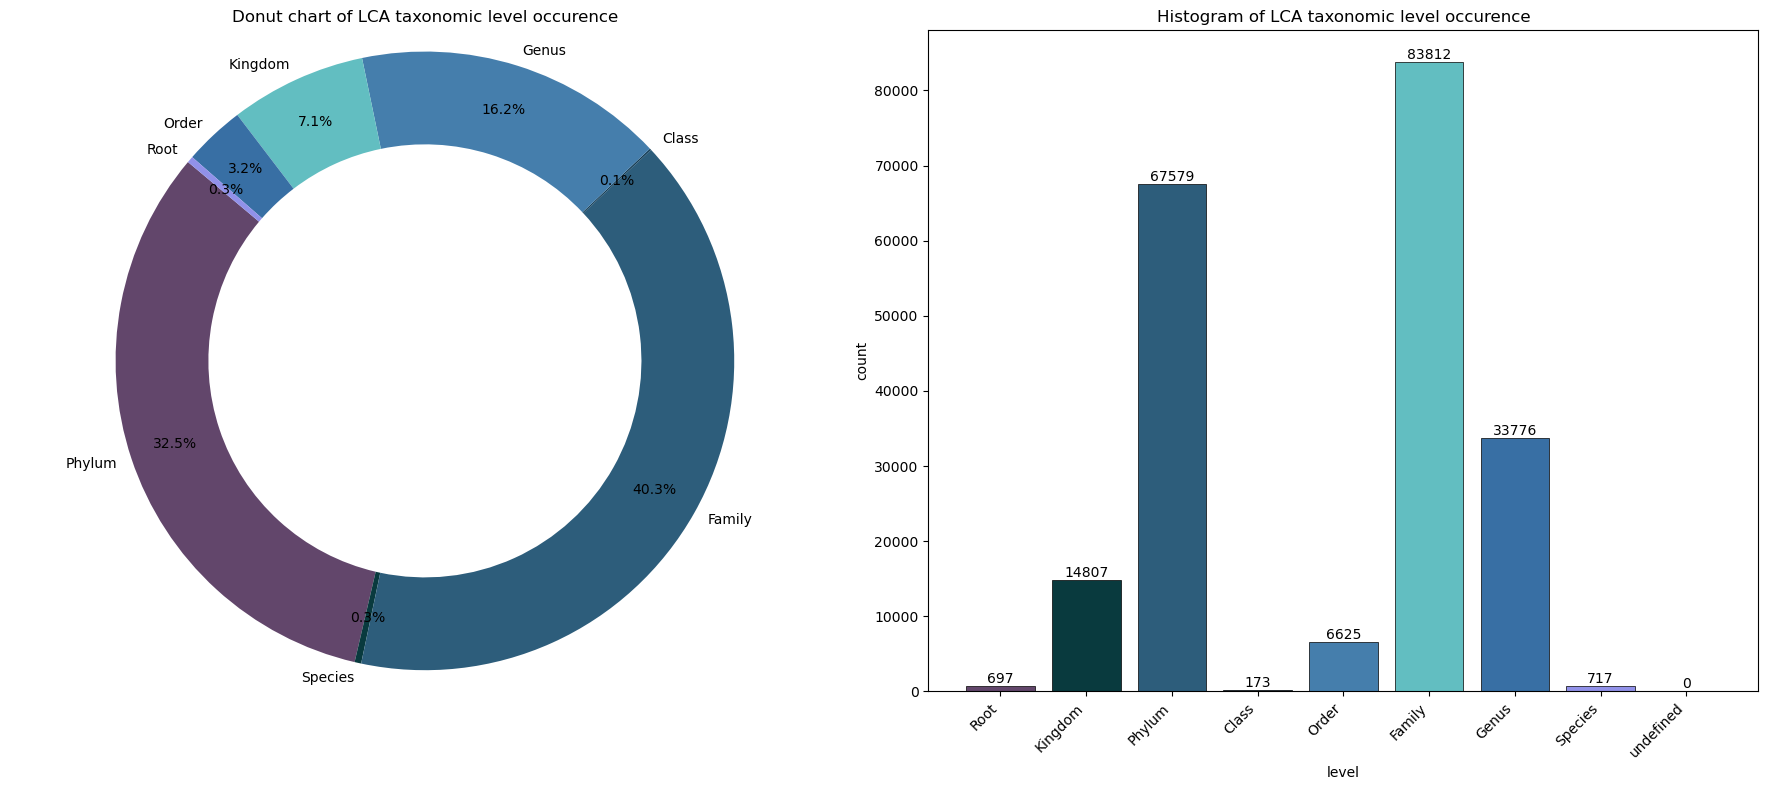

In [45]:
custom_order = ['Phylum', 'Species', 'Family', 'Class', 'Genus', 'Kingdom', 'Order', 'Root']
plot_donut_and_histogram_with_custom_order(df_clades, custom_order=custom_order,donut_explode=0, colors=lca_colors, title_donut="Donut chart of LCA taxonomic level occurence", title_hist="Histogram of LCA taxonomic level occurence")

### - Top 10 most frequent LCA distribution

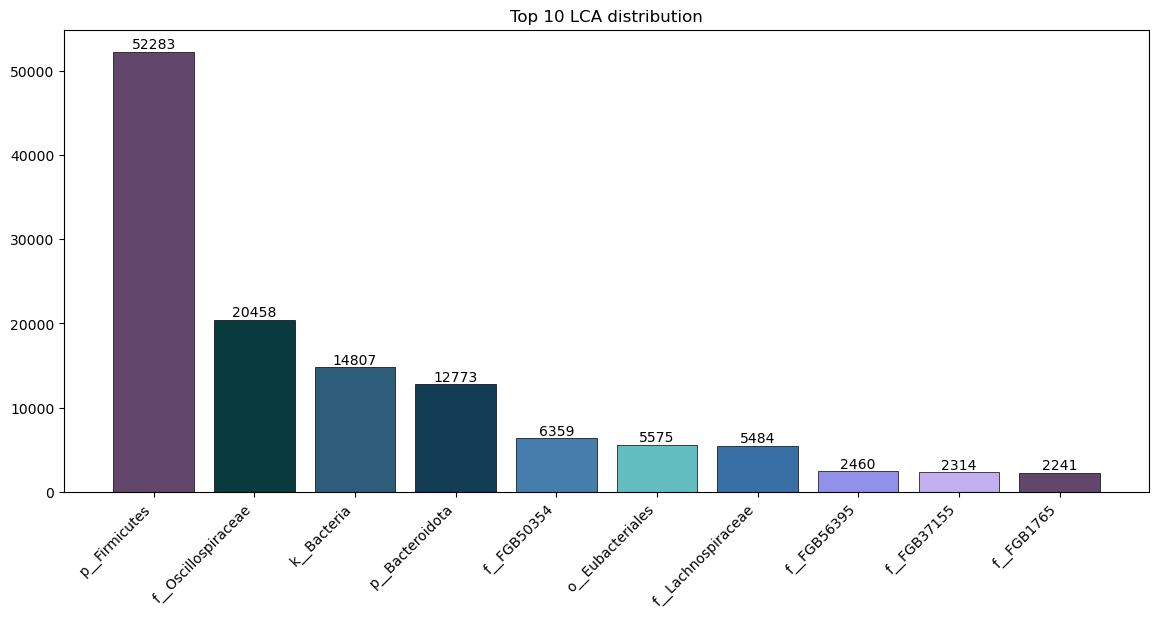

In [46]:
df_LCA_top10=df_LCA.head(10)
plt.figure(figsize=(14, 6))
plt.bar(df_LCA_top10["LCA"],df_LCA_top10["count"], color=lca_colors, edgecolor='black', linewidth=0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 LCA distribution')
for i, v in enumerate(df_LCA_top10["count"]):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

### -  Top 3 LCA at each taxonomic level

In [47]:
df_LCA_kingdom=make_df_top3_LCA(df_LCA,"k",3)
df_LCA_phylum=make_df_top3_LCA(df_LCA,"p",3)
df_LCA_class=make_df_top3_LCA(df_LCA,"c",3)
df_LCA_order=make_df_top3_LCA(df_LCA,"o",3)
df_LCA_family=make_df_top3_LCA(df_LCA,"f",3)
df_LCA_genus=make_df_top3_LCA(df_LCA,"g",3)
df_LCA_species=make_df_top3_LCA(df_LCA,"s",3)

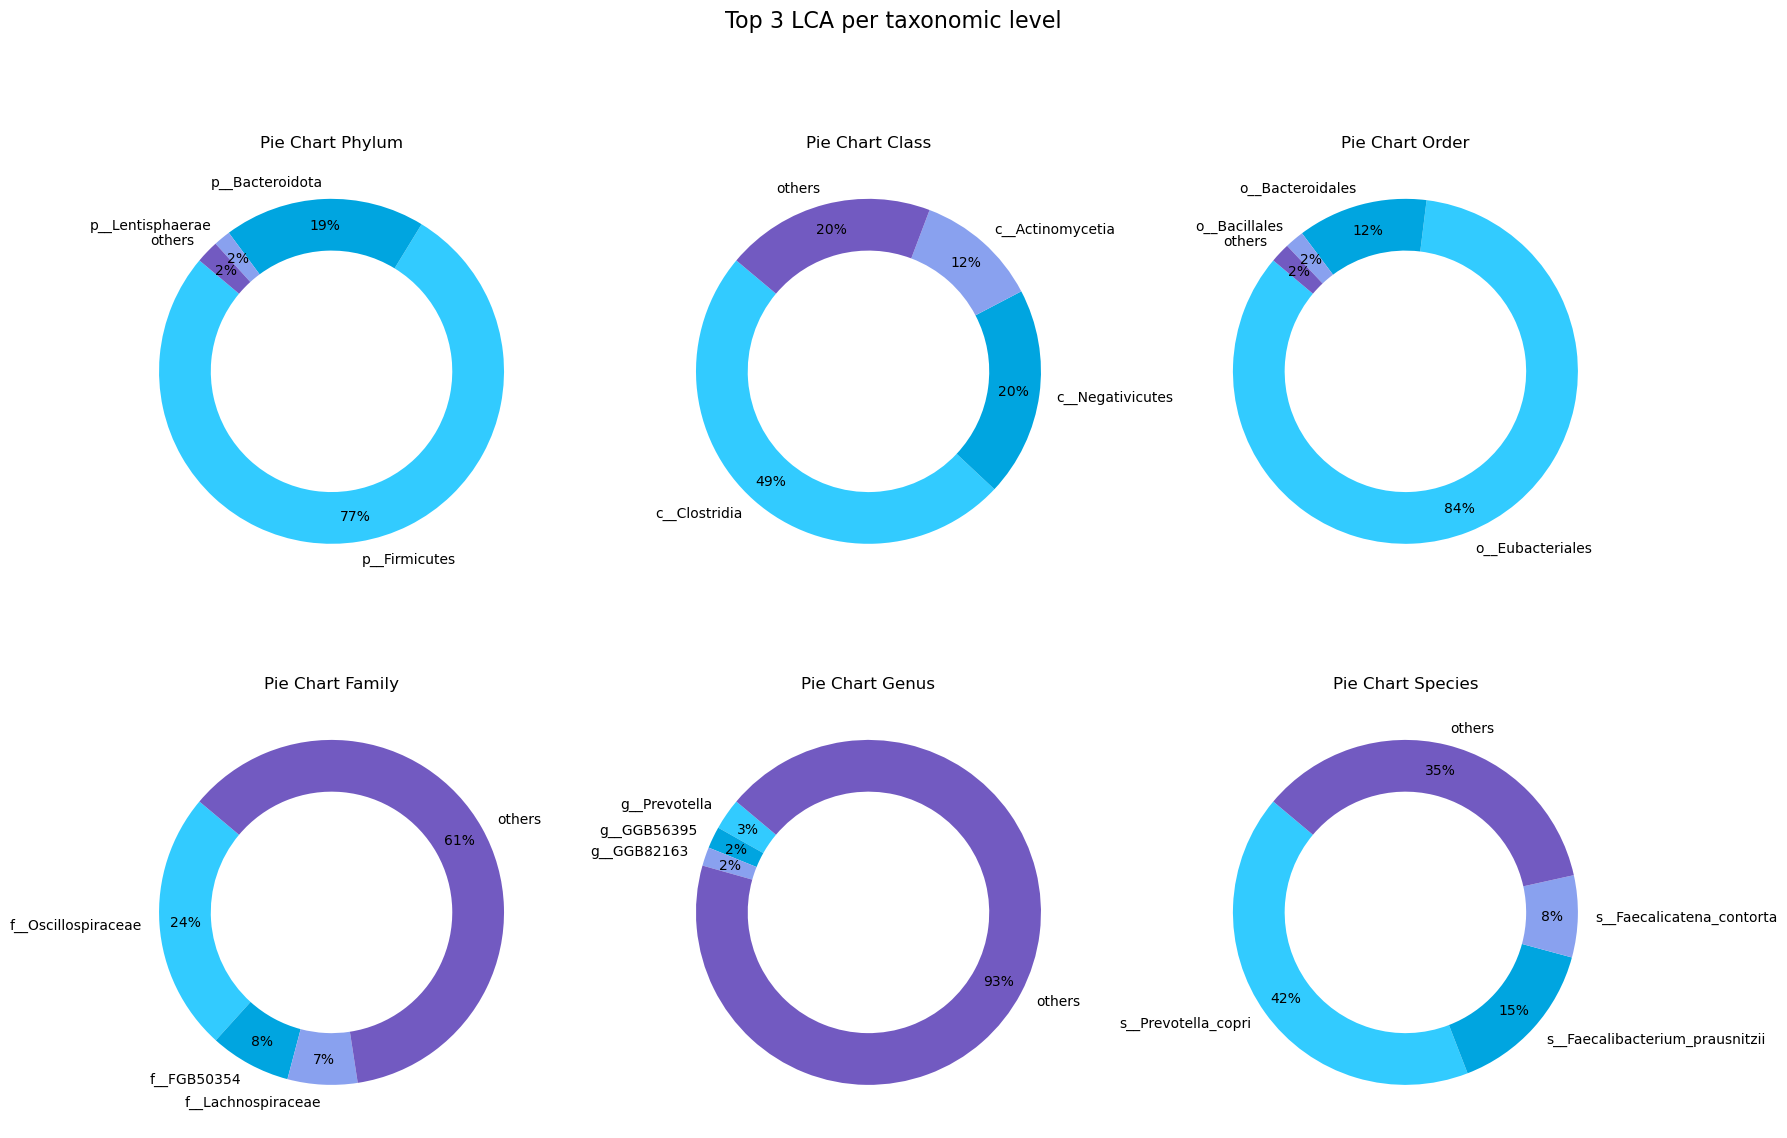

In [48]:
df_LCA_list=[df_LCA_phylum,df_LCA_class,df_LCA_order,df_LCA_family,df_LCA_genus,df_LCA_species]
names_list=["Phylum","Class","Order","Family","Genus","Species"]

make_multiple_pies(df_LCA_list,"count","LCA",family_colors,names_list)

## 2) Species frequency analysis

These analysis are not made on the LCAs but on the taxonomic path themselves, therefore the most frequent species are not the most frequent between the LCAs but conisdering all the analyzed HGT events taxa pair.

### - Most frequent species

In [49]:
df_top_species=df_top_species_raw.value_counts().rename_axis('tax').reset_index(name='count')
print(df_top_species["count"].sum())
df_top_species.head(10)

416372


,tax,count
0,s__Prevotella_copri,1895
1,s__GGB85863_SGB117542,1124
2,s__GGB56395_SGB113480,901
3,s__GGB82821_SGB114879,877
4,s__GGB56395_SGB104703,817
5,s__GGB13275_SGB117969,781
6,s__GGB85218_SGB119228,729
7,s__GGB9602_SGB15031,721
8,s__GGB13275_SGB117968,719
9,s__GGB85375_SGB119174,715


### - Correlation between species prevalence and species occurence in HGT

#### 1) Extract SGB prevalence

In [50]:
species=[]
prevalences=[]
with open("/home/giacomo/Thesis-Internship/SGB_richness_segatella_corrected.txt","r") as infile:
    #skip the first two lines
    next(infile)    
    next(infile)    
    for line in infile:
        taxa=line.split("\t")[0].split("|")[6]
        prevalence=int(line.split("\t")[1])
        species.append(taxa)
        prevalences.append(prevalence)
df_SGB_prevalence=pd.DataFrame(columns=["tax","prevalence"])
df_SGB_prevalence["tax"]=species
df_SGB_prevalence["prevalence"]=prevalences
#Sum togheter the prevalence of rows that have same tax
df_SGB_prevalence=df_SGB_prevalence.groupby("tax").sum().reset_index()
#Sort by prevalence
df_SGB_prevalence=df_SGB_prevalence.sort_values(by="prevalence",ascending=False, ignore_index=True)
df_SGB_prevalence.head(10)

,tax,prevalence
0,s__Faecalibacterium_prausnitzii,1340
1,s__Blautia_glucerasea,464
2,s__Escherichia_coli,404
3,s__Blautia_wexlerae,357
4,s__Lachnospiraceae_bacterium,350
5,s__Dorea_longicatena,336
6,s__Oscillibacter_valericigenes,325
7,s__Coprococcus_catus,320
8,s__Agathobaculum_butyriciproducens,308
9,s__Gemmiger_formicilis,289


#### 2) Merge prevalence with occurence df

In [51]:
df_top_species_prevalence=df_top_species.merge(df_SGB_prevalence, left_on="tax", right_on="tax")
print(df_top_species_prevalence.shape)
df_top_species_prevalence.head(10)

(7189, 3)


,tax,count,prevalence
0,s__Prevotella_copri,1895,232
1,s__GGB85863_SGB117542,1124,159
2,s__GGB56395_SGB113480,901,131
3,s__GGB82821_SGB114879,877,191
4,s__GGB56395_SGB104703,817,143
5,s__GGB13275_SGB117969,781,105
6,s__GGB85218_SGB119228,729,212
7,s__GGB9602_SGB15031,721,150
8,s__GGB13275_SGB117968,719,100
9,s__GGB85375_SGB119174,715,132


#### 3) Correlation plot occurence-prevalence
As frequency of SGBs in HGT events is highly correlated with prevalence, we need to normalizeby prevalence

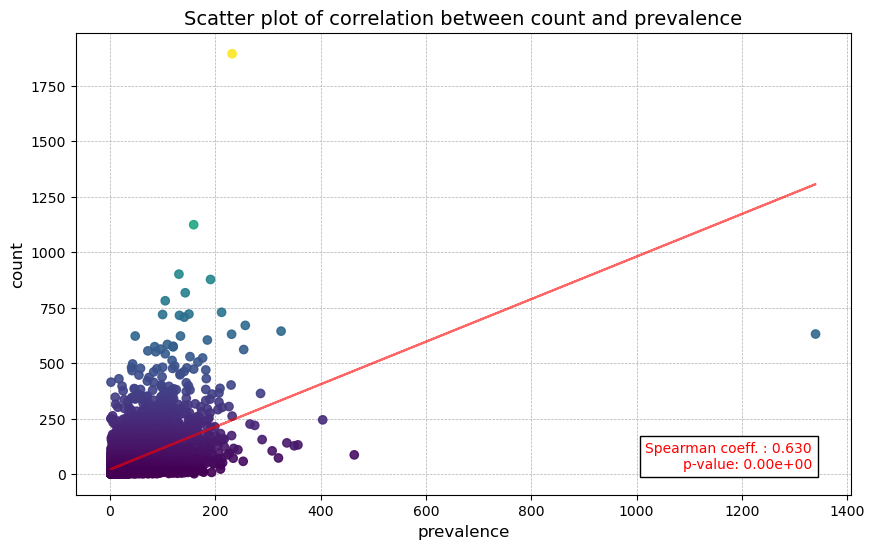

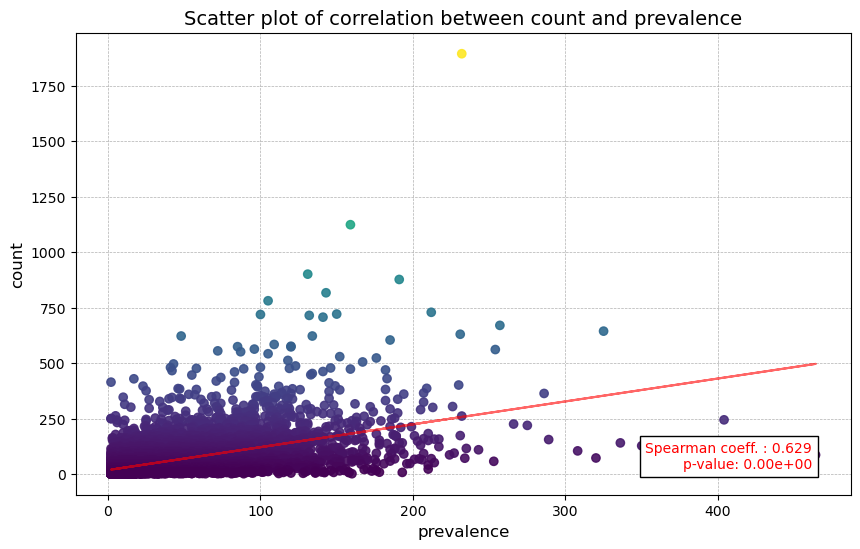

,tax,count,prevalence
0,s__Prevotella_copri,1895,232


In [85]:
spearman_correlation_scatter(df_top_species_prevalence, "count", "prevalence")
#Calculate spearmann coefficient for count and prevalence
r_occurence_prevalence=stats.spearmanr(df_top_species_prevalence["count"],df_top_species_prevalence["prevalence"])
r_occurence_prevalence
#remove entry with highest prevalence
df_top_species_prevalence_no_outliers=df_top_species_prevalence[df_top_species_prevalence["prevalence"]<800]
#df_top_species_prevalence_no_outliers=df_top_species_prevalence_no_outliers[df_top_species_prevalence_no_outliers["count"]<1000]
#remove outlieres
spearman_correlation_scatter(df_top_species_prevalence_no_outliers, "count", "prevalence")
#Calculate spearmann coefficient for count and prevalence
r_occurence_prevalence_no_outliers=stats.spearmanr(df_top_species_prevalence_no_outliers["count"],df_top_species_prevalence_no_outliers["prevalence"])
r_occurence_prevalence_no_outliers

df_top_species_prevalence[df_top_species_prevalence["tax"]=="s__Prevotella_copri"]

#### 4) Normalization

In [86]:
#Normalize count by prevalence
max_prevalence=df_top_species_prevalence_no_outliers["prevalence"].max()
df_top_species_prevalence_no_outliers["count_normalized"]=df_top_species_prevalence_no_outliers["count"]*(max_prevalence/df_top_species_prevalence_no_outliers["prevalence"])

/tmp/ipykernel_6600/525542083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_species_prevalence_no_outliers["count_normalized"]=df_top_species_prevalence_no_outliers["count"]*(max_prevalence/df_top_species_prevalence_no_outliers["prevalence"])


### - Most frequent species normalized 

In [87]:
#order top_species_normalized by count_normalized
df_top_species_prevalence_no_outliers=df_top_species_prevalence_no_outliers.sort_values(by="count_normalized",ascending=False, ignore_index=True)
print(df_top_species_prevalence_no_outliers.shape)
df_top_species_prevalence_no_outliers.head(10)


(7188, 4)


,tax,count,prevalence,count_normalized
0,s__GGB4745_SGB6571,414,2,96048.000000
1,s__Lysinibacillus_odysseyi,250,2,58000.000000
2,s__GGB85184_SGB119519,249,2,57768.000000
3,s__GGB47970_SGB118254,114,2,26448.000000
4,s__GGB9350_SGB14317,163,3,25210.666667
5,s__GGB83875_SGB121692,161,3,24901.333333
6,s__GGB85358_SGB119142,262,5,24313.600000
7,s__GGB86190_SGB117911,153,3,23664.000000
8,s__GGB84045_SGB122038,100,2,23200.000000
9,s__GGB81658_SGB112841,91,2,21112.000000


## 3) Donor and recipient analysis

In [94]:
df_top_donor=df_top_donor_raw.value_counts().rename_axis('tax').reset_index(name='count')
print(df_top_donor.shape)
#merge with df_top_species_prevalence_no_outliers to get the prevalence
df_top_donor_prevalence=df_top_donor.merge(df_top_species_prevalence_no_outliers[["tax","prevalence"]], left_on="tax", right_on="tax")
max_prevalence=df_top_donor_prevalence["prevalence"].max()
df_top_donor_prevalence["count_normalized"]=df_top_donor_prevalence["count"]*(max_prevalence/df_top_donor_prevalence["prevalence"])
df_top_donor_prevalence=df_top_donor_prevalence.sort_values(by="count_normalized",ascending=False, ignore_index=True)
print(df_top_donor_prevalence.shape)
df_top_donor_prevalence.head(10)


(148, 2)
(139, 4)


,tax,count,prevalence,count_normalized
0,s__Prevotella_sp_PCHR,2,2,357.000000
1,s__GGB9739_SGB15313,2,2,357.000000
2,s__GGB781_SGB1024,30,39,274.615385
3,s__GGB1354_SGB1818,2,3,238.000000
4,s__GGB82013_SGB35739,1,2,178.500000
5,s__Traorella_massiliensis,1,2,178.500000
6,s__GGB6521_SGB9212,1,2,178.500000
7,s__GGB1153_SGB1481,1,2,178.500000
8,s__GGB3241_SGB4282,1,2,178.500000
9,s__GGB32033_SGB59650,1,2,178.500000


In [91]:
df_top_recipient=df_top_recipient_raw.value_counts().rename_axis('tax').reset_index(name='count')
#merge with df_top_species_prevalence_no_outliers to get the prevalence
df_top_recipient_prevalence=df_top_recipient.merge(df_top_species_prevalence_no_outliers[["tax","prevalence"]], left_on="tax", right_on="tax")
max_prevalence=df_top_recipient_prevalence["prevalence"].max()
df_top_recipient_prevalence["count_normalized"]=df_top_recipient_prevalence["count"]*(max_prevalence/df_top_recipient_prevalence["prevalence"])
df_top_recipient_prevalence=df_top_recipient_prevalence.sort_values(by="count_normalized",ascending=False, ignore_index=True)
#extract prevotella copri
df_top_recipient_prevalence.head(10)

,tax,count,prevalence,count_normalized
0,s__Prevotella_copri,138,232,199.862069
1,s__Acidaminococcus_fermentans,1,4,84.000000
2,s__GGB3662_SGB4973,1,4,84.000000
3,s__GGB48686_SGB115399,1,6,56.000000
4,s__Treponema_bryantii,2,17,39.529412
5,s__GGB84090_SGB121911,1,9,37.333333
6,s__GGB70560_SGB119662,1,11,30.545455
7,s__Terrisporobacter_mayombei,1,12,28.000000
8,s__GGB2631_SGB3548,1,12,28.000000
9,s__Prevotella_hominis,19,231,27.636364


## 4) Species pair frequency analysis

#### - Most frequent species pair

In [57]:
df_top_pairs=df_top_pairs_raw.value_counts().rename_axis('pair').reset_index(name='count')
df_top_pairs.head(10)

,pair,count
0,s__GGB41963_SGB116829-s__GGB41963_SGB116830,449
1,s__GGB82821_SGB114879-s__GGB82823_SGB114878,371
2,s__Prevotella_copri-s__Prevotella_copri,301
3,s__GGB85727_SGB118472-s__GGB85728_SGB118473,265
4,s__GGB79329_SGB105807-s__GGB79329_SGB119616,257
5,s__Prevotella_hominis-s__Prevotella_copri,244
6,s__GGB13275_SGB117969-s__GGB13275_SGB117968,238
7,s__GGB82749_SGB114743-s__GGB82749_SGB114742,211
8,s__GGB85775_SGB117464-s__GGB85775_SGB117463,206
9,s__Pradoshia_eiseniae-s__Bacillus_sp_FJAT_27916,191


### - Correlation between species pair prevalence and occurence in HGT events
association betwenn prevalence and HGT (HGT-prevalence)(HGt-prevalence+rankingpair)

#### 0) Calculate expected prevalence of species pair

In [58]:
#for each row in df_top_pairs, extract the pair and search for the prevalence in df_SGB_prevalence
expected_prevalences=[]
pairs=[]

# Convert the prevalence DataFrame to a dictionary for faster lookup
prevalence_dict = df_SGB_prevalence.set_index('tax')['prevalence'].to_dict()

# Iterate over each pair in df_top_pairs
for index, row in df_top_pairs.iterrows():
    pair = row["pair"]
    tax1, tax2 = pair.split("-")
    
    # Get the prevalence for each species, defaulting to 0 if not found
    prevalence1 = prevalence_dict.get(tax1, 0)
    prevalence2 = prevalence_dict.get(tax2, 0)
    
    # Calculate the expected prevalence for the pair
    expected_prevalence = prevalence1 * prevalence2
    expected_prevalences.append(expected_prevalence)
    
    # Append the pair to the list
    pairs.append(f"{tax1}-{tax2}")

# Create the DataFrame
df_expected_top_pairs = pd.DataFrame({
    "pair": pairs,
    "expected_prevalence": expected_prevalences
})

df_expected_top_pairs.head(10)

,pair,expected_prevalence
0,s__GGB41963_SGB116829-s__GGB41963_SGB116830,7568
1,s__GGB82821_SGB114879-s__GGB82823_SGB114878,13752
2,s__Prevotella_copri-s__Prevotella_copri,53824
3,s__GGB85727_SGB118472-s__GGB85728_SGB118473,15120
4,s__GGB79329_SGB105807-s__GGB79329_SGB119616,30305
5,s__Prevotella_hominis-s__Prevotella_copri,53592
6,s__GGB13275_SGB117969-s__GGB13275_SGB117968,10500
7,s__GGB82749_SGB114743-s__GGB82749_SGB114742,6278
8,s__GGB85775_SGB117464-s__GGB85775_SGB117463,37925
9,s__Pradoshia_eiseniae-s__Bacillus_sp_FJAT_27916,10670


#### 1) merge prevalence and HGT occurence

In [59]:
#remove rows with 0 expected prevalence
df_expected_top_pairs_no_zero=df_expected_top_pairs[df_expected_top_pairs["expected_prevalence"]>0]

In [60]:
#merge df_SGB_prevalence with df_top_species
df_top_pairs_prevalence=df_top_pairs.merge(df_expected_top_pairs_no_zero, left_on="pair", right_on="pair")
#add a rank column
max_pair_prevalence=df_top_pairs_prevalence["expected_prevalence"].max()
df_top_pairs_prevalence["count_normalized"]=df_top_pairs_prevalence["count"]*(max_pair_prevalence/df_top_pairs_prevalence["expected_prevalence"])
df_top_pairs_prevalence=df_top_pairs_prevalence.sort_values(by="count_normalized",ascending=False, ignore_index=True)
pd.set_option('display.max_colwidth', None)
df_top_pairs_prevalence.head(10)

,pair,count,expected_prevalence,count_normalized
0,s__GGB25532_SGB37495-s__GGB3160_SGB4174,70,12,1.047433e+07
1,s__GGB25544_SGB42416-s__GGB29578_SGB42378,27,8,6.060150e+06
2,s__Lysinibacillus_capsici-s__Lysinibacillus_odysseyi,9,4,4.040100e+06
3,s__GGB24095_SGB112224-s__GGB24095_SGB112225,34,20,3.052520e+06
4,s__GGB23817_SGB112704-s__GGB23817_SGB35531,14,9,2.793156e+06
5,s__GGB86195_SGB118163-s__GGB86196_SGB118164,23,15,2.753253e+06
6,s__Flavobacterium_ummariense-s__GGB82440_SGB114395,6,4,2.693400e+06
7,s__GGB29465_SGB42244-s__GGB29430_SGB42206,8,6,2.394133e+06
8,s__GGB4745_SGB6571-s__GGB84859_SGB120765,26,20,2.334280e+06
9,s__GGB9063_SGB13982-s__GGB4745_SGB6571,13,10,2.334280e+06


In [61]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

#### 2) Correlation plot

## 5) Strain transmissibility analysis

### - Most frequent strains

In [19]:
df_top_strains=df_top_strains_raw.value_counts().rename_axis('tax').reset_index(name='count')
df_top_strains.head(10)

,tax,count
0,t__SGB117542,1124
1,t__SGB113480,901
2,t__SGB114879,877
3,t__SGB104703,817
4,t__SGB117969,781
5,t__SGB119228,729
6,t__SGB15031,721
7,t__SGB117968,719
8,t__SGB119174,715
9,t__SGB77806,707


### - Most frequent strain normalized

#### 0) Extract prevalence

In [20]:
strains=[]
prevalences=[]
with open("/home/giacomo/Thesis-Internship/SGB_richness_segatella_corrected.txt","r") as infile:
    #skip the first two lines
    next(infile)    
    next(infile)    
    for line in infile:
        taxa=line.split("\t")[0].split("|")[7]
        prevalence=int(line.split("\t")[1])
        strains.append(taxa)
        prevalences.append(prevalence)
df_strains_prevalence=pd.DataFrame(columns=["tax","prevalence"])
df_strains_prevalence["tax"]=strains
df_strains_prevalence["prevalence"]=prevalences
#Sum togheter the prevalence of rows that have same tax
df_strains_prevalence=df_strains_prevalence.groupby("tax").sum().reset_index()
#Sort by prevalence
df_strains_prevalence=df_strains_prevalence.sort_values(by="prevalence",ascending=False, ignore_index=True)
df_strains_prevalence.head(10)

,tax,prevalence
0,t__SGB10068,404
1,t__SGB119224,257
2,t__SGB118825,235
3,t__SGB119017,234
4,t__SGB5090,232
5,t__SGB1626,232
6,t__SGB15236,231
7,t__SGB4940,230
8,t__SGB79902,227
9,t__SGB120819,226


#### 1) Normalize by prevalence

In [22]:
#merge df_strains_prevalence and df_top_strains
df_top_strains_prevalence=df_top_strains.merge(df_strains_prevalence, left_on="tax", right_on="tax")
max_prevalence=df_top_strains_prevalence["prevalence"].max()
df_top_strains_prevalence["count_normalized"]=df_top_strains_prevalence["count"]*(max_prevalence/df_top_strains_prevalence["prevalence"])
df_top_strains_prevalence=df_top_strains_prevalence.sort_values(by="count_normalized",ascending=False, ignore_index=True)
df_top_strains_prevalence.head(10)

,tax,count,prevalence,count_normalized
0,t__SGB6571,414,2,83628.000000
1,t__SGB7477,250,2,50500.000000
2,t__SGB119519,249,2,50298.000000
3,t__SGB118254,114,2,23028.000000
4,t__SGB14317,163,3,21950.666667
5,t__SGB121692,161,3,21681.333333
6,t__SGB119142,262,5,21169.600000
7,t__SGB117911,153,3,20604.000000
8,t__SGB122038,100,2,20200.000000
9,t__SGB112841,91,2,18382.000000


### - Correlation between strains occurence and strain transmissibility

#### 0) calculate the species transmissibility

In [23]:
strains=[]
transmissibilities=[]
with open("/home/giacomo/Thesis-Internship/interindividual_SGB_transmissibility.tsv","r") as infile:
    #skip the first two lines
    next(infile)        
    for line in infile:
        line=line.rstrip()
        strains.append(line.split("\t")[0])
        transmissibilities.append(line.split("\t")[1])
        
df_strains_transmissibility=pd.DataFrame(columns=["tax","transmissibility"])
df_strains_transmissibility["tax"]=strains
df_strains_transmissibility["transmissibility"]=transmissibilities
df_strains_transmissibility["transmissibility"]=df_strains_transmissibility["transmissibility"].astype(float)
#Sum togheter the prevalence of rows that have same tax
df_strains_transmissibility=df_strains_transmissibility.groupby("tax").sum().reset_index()
#Sort by prevalence
df_strains_transmissibility=df_strains_transmissibility.sort_values(by="transmissibility",ascending=False, ignore_index=True)
df_strains_transmissibility.head(10)

,tax,transmissibility
0,t__SGB5782,0.999817
1,t__SGB9277,0.985075
2,t__SGB58496,0.976510
3,t__SGB6188,0.918919
4,t__SGB19697,0.909483
5,t__SGB20003,0.869779
6,t__SGB19690,0.858491
7,t__SGB2135,0.857143
8,t__SGB3542,0.785276
9,t__SGB15149,0.750000


#### 1) Merge transmissibility and occurence df

In [24]:
#merge df_strains_transmissibility and df_top_strains prevalence
df_top_strains_transmissibility=df_top_strains_prevalence.merge(df_strains_transmissibility, left_on="tax", right_on="tax")
df_top_strains_transmissibility.head(10)

,tax,count,prevalence,count_normalized,transmissibility
0,t__SGB14317,163,3,21950.666667,0.000000
1,t__SGB4760,74,3,9965.333333,0.000000
2,t__SGB4573,38,3,5117.333333,0.000000
3,t__SGB17365,184,15,4955.733333,0.000000
4,t__SGB1891,101,9,4533.777778,0.000000
5,t__SGB6308,133,12,4477.666667,0.000000
6,t__SGB15004,27,3,3636.000000,0.000000
7,t__SGB6358,59,7,3405.142857,0.000000
8,t__SGB113478,476,58,3315.586207,0.010554
9,t__SGB95101,446,55,3276.072727,0.000000


#### 2) correlation between transmissibility and normalized occurence

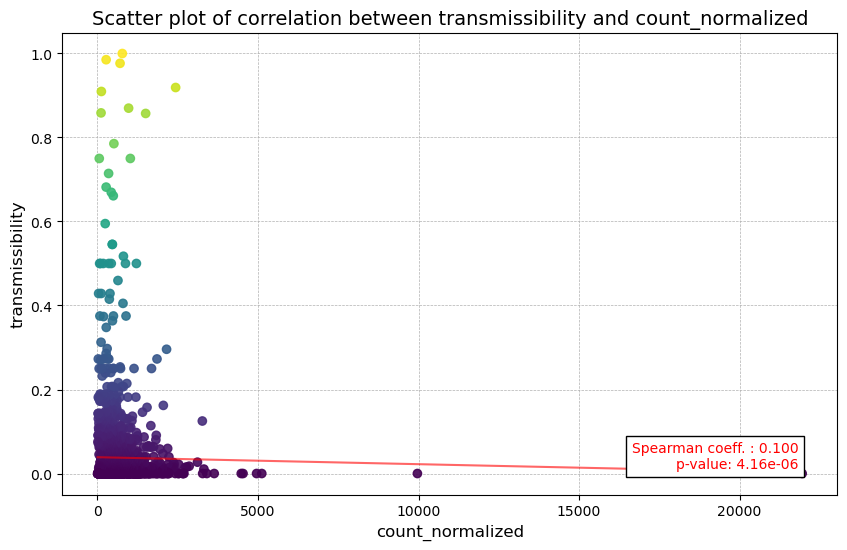

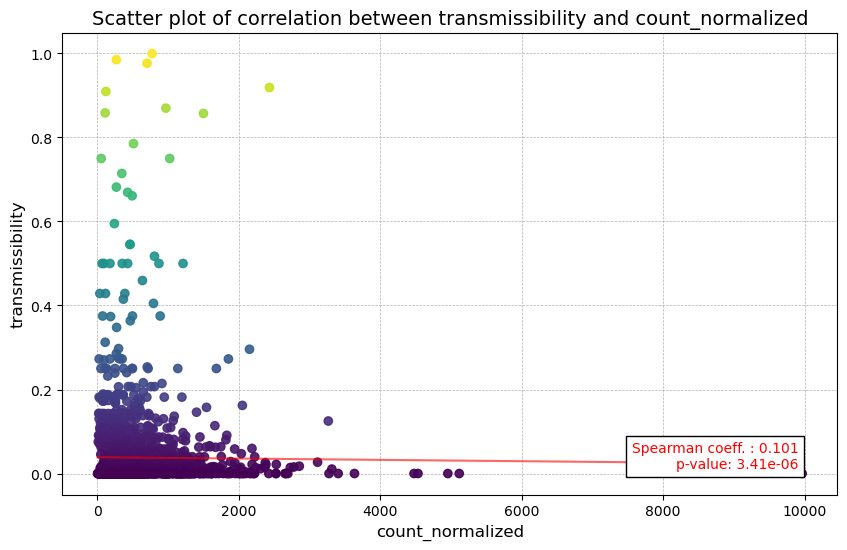

In [25]:
spearman_correlation_scatter(df_top_strains_transmissibility, "transmissibility", "count_normalized")
#remove entries with count grater than 10000
df_top_strains_transmissibility_no_outliers=df_top_strains_transmissibility[df_top_strains_transmissibility["count_normalized"]<10000]
spearman_correlation_scatter(df_top_strains_transmissibility_no_outliers, "transmissibility", "count_normalized")

## 5) Gene analysis

### - Overall, Uniclust and Uniref genes frequency

In [ ]:
df_gene=df_gene_raw.value_counts().rename_axis('gene').reset_index(name='count')
print(df_gene["count"].sum())
df_gene.head(11)

314393


,gene,count
0,unclear_direction,230352
1,A0A0D5ZC06,120
2,IBPCCGNE00052,109
3,KNFOBCNG00264,106
4,HLPCKPND01499,81
5,A0A366U8W6,66
6,LMNPNGLF01283,56
7,A0A070FJW8,54
8,R9I0V2,48
9,R5QEH0,48


In [ ]:
df_gene_uniclust=df_gene_uniclust_raw.value_counts().rename_axis('gene').reset_index(name='count')
print(df_gene_uniclust["count"].sum())
df_gene_uniclust.head(10)

65487


,gene,count
0,IBPCCGNE00052,109
1,KNFOBCNG00264,106
2,HLPCKPND01499,81
3,LMNPNGLF01283,56
4,OHHPMDFM00457,47
5,JBJBFDEL01535,43
6,HDEJPCID01815,43
7,AHCDLFJL01962,41
8,EAIJIOPF01864,41
9,DKIPLHBB00798,40


In [ ]:
df_gene_uniref=df_gene_uniref_raw.value_counts().rename_axis('gene').reset_index(name='count')
print(df_gene_uniref["count"].sum())
print(df_gene_uniref.shape)
df_gene_uniref.head(10)

18554
(12707, 2)


,gene,count
0,A0A0D5ZC06,120
1,A0A366U8W6,66
2,A0A070FJW8,54
3,R5QEH0,48
4,R9I0V2,48
5,A0A175AB67,47
6,UPI0009A2533E,43
7,A0A1Y4FW51,42
8,A0A143XRI6,41
9,A0A174SVG3,38


### - Retrieving the Uniref 2024 ids

#### 1) Save gene list and copy it to the shiva clust to execute script

In [ ]:
# # Save the gene list as a file and copy it to the shiva cluster, where the mapping file is
# with open("/home/giacomo/Thesis-Internship/waafle/uniref_new_ids_retrieval/gene_list_uniref_qc_allevents.txt", "w") as outfile:
#     for gene in gene_list_uniref:
#         if gene!="unclear_direction":
#             outfile.write(gene+"\n")

#### 2) Retrieve the list with mapped uniref ids

In [ ]:
#copy mapped_genes.txt obtained from the code that is in shiva file from the cluster and turn it into a list
mapped_genes=[]
with open("/home/giacomo/Thesis-Internship/waafle/uniref_new_ids_retrieval/mapped_genes_uniref_qc_allevents.txt", "r") as infile:
    for line in infile:
        line=line.rstrip()
        mapped_genes.append(line)
        
print(len(mapped_genes))

18554


#### 3) Uniref 2024 genes frequency

In [ ]:
df_gene_uniref_new_raw=pd.DataFrame()
df_gene_uniref_new_raw["gene"]=mapped_genes

df_gene_uniref_new=df_gene_uniref_new_raw.value_counts().rename_axis('gene').reset_index(name='count')
print(df_gene_uniref_new.shape)
#turn the gene column into a list
gene_list_new_uniref=df_gene_uniref_new["gene"].to_list()
print(len(gene_list_new_uniref))

df_gene_uniref_new.head(10)

(12683, 2)
12683


,gene,count
0,D7UVR2,186
1,A0A070FJW8,54
2,R5QEH0,48
3,R9I0V2,48
4,A0A175AB67,47
5,UPI0009A2533E,43
6,A0A1Y4FW51,42
7,A0A143XRI6,41
8,A0A174SVG3,38
9,A0A3D5WK30,34


#### 4) Save genes in a file to retrive neuroptentiality (Albert)

In [ ]:
#save the gene list in a file with each gene as a row
with open("/home/giacomo/Thesis-Internship/waafle/unique_genes_neuropotential_QC.txt", "w") as outfile:
    for gene in gene_list_new_uniref:
        outfile.write(gene+"\n")

## 6) Functional analysis

### - Retrieve uniref gene functions from uniprot API

In [ ]:
# df_functions=pd.DataFrame()

# def get_uniprot_function(gene_code):
#     url = f"https://rest.uniprot.org/uniprotkb/{gene_code}.json"
#     try:
#         response = requests.get(url)
#         response.raise_for_status()
#         data = response.json()
#         function = data.get('proteinDescription', {}).get('recommendedName', {}).get('fullName', {}).get('value', "Function not available")
#         return function
#     except requests.exceptions.RequestException:
#         return "unable to acess API"

# # Initialize an empty list to store the functions
# functions = []
# counts=[]

# # Iterate through the DataFrame and retrieve functions
# for index, row in df_gene_uniref_new.iterrows():
#     gene_code = row['gene']
#     count=row['count']
#     if gene_code.startswith("unclear_direction"):
#         functions.append("unable to establisg HGT directionality")
#     else:
#         functions.append(get_uniprot_function(gene_code))
#         counts.append(count)

# # Add the functions to the DataFrame
# df_functions['function'] = functions
# df_functions["count"]=counts

# # Print the updated DataFrame
# print(df_functions.shape)
# df_functions.head(10)

KeyboardInterrupt: 

In [ ]:
# Print the updated DataFrame
print(df_functions.shape)
df_functions.head(10)

(12683, 2)


,function,count
0,RNAase,186
1,Function not available,54
2,Function not available,48
3,Function not available,48
4,Function not available,47
5,unable to acess API,43
6,Function not available,42
7,Function not available,41
8,Function not available,38
9,Function not available,34


In [ ]:
# save df function
#df_functions.to_csv("/home/giacomo/Thesis-Internship/waafle/df_functions_uniref_qc_allevents.tsv", sep="\t", index=False)
df_functions=pd.read_csv("/home/giacomo/Thesis-Internship/waafle/df_functions_uniref_qc_allevents.tsv", sep="\t")

print(df_functions["count"].sum())

18554


### - Functional analysis

In [ ]:
df_functions_count_raw=df_functions.copy()
df_functions_count=df_functions_count_raw.groupby('function')['count'].sum().reset_index()
df_functions_count=df_functions_count.sort_values(by='count', ascending=False, ignore_index=True)

df_functions_count.head(20)

,function,count
0,Function not available,10566
1,unable to acess API,1129
2,RNAase,186
3,site-specific DNA-methyltransferase (adenine-s...,141
4,HTH cro/C1-type domain-containing protein,120
5,Transposase,104
6,Tyr recombinase domain-containing protein,79
7,Large ribosomal subunit protein bL33,74
8,Integrase catalytic domain-containing protein,59
9,Mutator family transposase,50


In [ ]:
# Sum the counts of all rows except forst two
other_count = df_functions_count.iloc[2:]['count'].sum()
other_count

6859